
# Lead Scoring - Case Study
---------------

### X Education

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.                          
Although X Education gets a lot of leads, its lead conversion rate is very poor.



-----------------------

`Overall Approach`: *The below-mentioned steps will be followed to study the data set provided and with the help of Logistic Regression techniques, Inferences will be made on the Business Problem.*                  
Steps: Here the CRISP-DM or Cross Industry Process of Data Mining will be loosely followed,              
1. *Business Understanding* -> Go through the problem statement provided, understand the business requirement, try to identify the major KPI's and client expectations.
2. *Data Collection* -> Obtaining the data necessary for performing operations to meet the Business requirement.
3. *Data Understanding* -> Through EDA on the obtained data, identify/understand the patterns and obtain insights to data.
4. *Data Preperation/Preprocessing* -> Manipulate or process the data to best meet the criteria for model building.
5. *Data Modelling or Model Building* -> Build model to identify the major KPI required to solve the business problem
6. *Model Evaluation* -> Based upon the model built, evaluate it.

## Business Understanding               
`Problem Statement`: X Education wants our help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data Collection            
We have been provided with "Leads" dataset with the following KPI, this dataset will be explored in depth in later stages to obtain meaningful inference towards the Problem Statement.

before we move onto the Data Understanding stage, lets import the base libraries which will be used in the case study and obtain the data from "Leads.csv" onto a DataFrame.

Base Libraries -->

In [372]:
import numpy as np

import pandas as pd
from random import sample
from math import isnan

# For visual representation
import matplotlib.pyplot as plt
import seaborn as sns

# Rescalling Data
import sklearn
from sklearn.preprocessing import StandardScaler

# Train-test split
from sklearn.model_selection import train_test_split

# Modelling
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [373]:
# Set display option for Pandas objects to display all the columns when DataFrames are viewed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [374]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Obtaining data from "Leads.csv"

In [375]:
# Assuming that the .csv files is present in the same directory as the jupyter notebook file (.ipynb file), hence relative path is used to fetch the data.     
# Incase the excel files are present in different directories then absolute path would be used. In that case we would do something like*     
# pd.read_csv(r"C:\Lead Score Case Study\Leads.csv")

# Retrieve Dataset
df_leads = pd.read_csv("Leads.csv")
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Understanding             
In this section we will try to explore the Dataset and try to obtain some meaningful inferences from it.                           
This is primarily devided into the following sections
- Data Cleaning
- EDA: Exploratory Data Analysis (Some part would be done along with Data Cleaning and few post it)

### Data Cleaning               
here we will focus on the following activities:                    
* Task 1: Perform simple data operations like check values, Data types, shape of DataFrame, basic information about the DataFrame etc.
* Task 2: check for categories in categorical variables this will help in identifying how many dummies need to be created for each. 
* Task 3: convert any categories like Select, Option etc. to np.nan, these categories depict that user might not have selected an option while form is being filled.
* Task 4: Drop Columns which have no business value
* Task 5: check for % of Missing values and drop columns with high number of missing values
* Task 6: Check for distribution of each unique value in categorical fields and drop columns which are highly skewed
* Task 7: For categorical fields where the categories are highly distributed like 1 2 3... %ages.. try to bucket such categories into "other"
* Task 8: Handle missing values either here or after row wise checks
* Task 9: Perform the same operations for Row as well i.e. Row wise check Null values and drop rows with very high number of null values
* Task 10: Check how many rows are retained after all above operations

lets start Data Cleaning Process...                     
#### Task 1

In [376]:
# Check the rows and columns in the Dataset
df_leads.shape

(9240, 37)

`Total Rows`: 9240                  
Columns: 37

In [377]:
# Lets check the columns
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

There are many columns with very large name, for now we will leave it as it is.. later we will change the name of columns if needed

In [378]:
# Lets check basic information about the Dataset
# Data Types of each column
df_leads.info()

# Similar information can be obtained from df_leads.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [379]:
# Lets view the Dataset to confirm if the above Data Types seem correctly mapped or not
df_leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


At 1st glace the Data types seems to have been correctly captured from the csv file.

In [380]:
# Lets check some information for the numerical column
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Task 2: Check for categories in Categorical Variables

In [381]:
# Lets start with Lead Origin
df_leads["Lead Origin"].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

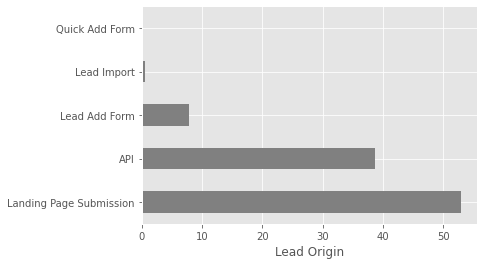

In [382]:
# Lets visualize the same information
plt.style.use('ggplot')
(df_leads["Lead Origin"].value_counts(normalize=True)*100).plot.barh(color='grey')
plt.xlabel("Lead Origin")
plt.show()

here we can see that few categories have more weightage than others, how to handle this we will explore in later stage...

In [383]:
# Lets check another variable say Specialization
df_leads["Specialization"].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

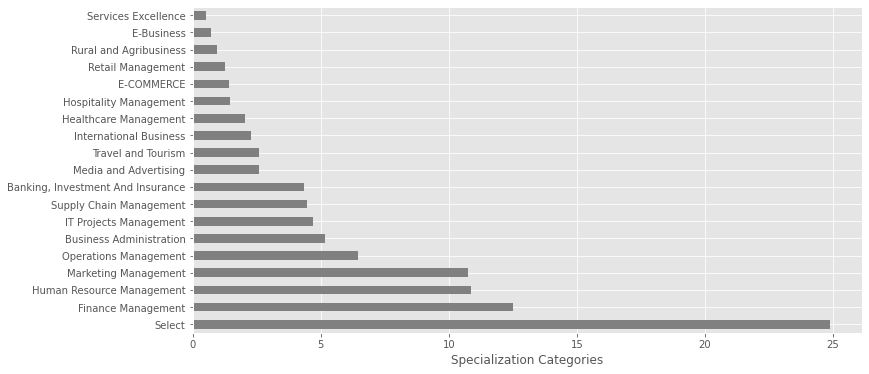

In [384]:
# Lets visualize Specialization as well

plt.figure(figsize=(12,6))
plt.style.use('ggplot')
(df_leads["Specialization"].value_counts(normalize=True)*100).plot.barh(color='grey')
plt.xlabel("Specialization Categories")
plt.show()

We could see "Select" as a category has almost 25% of weightage. Select represents that the user has not opted to provide any information for this. lets check if any other column also has this Select present in it.

In [385]:
df_leads["How did you hear about X Education"].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

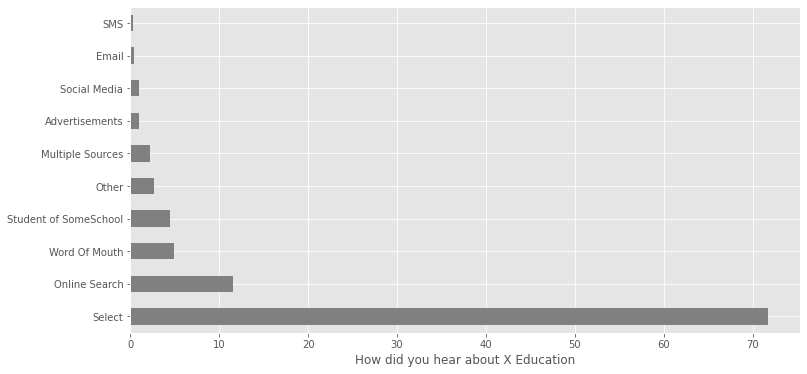

In [386]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
(df_leads["How did you hear about X Education"].value_counts(normalize=True)*100).plot.barh(color='grey')
plt.xlabel("How did you hear about X Education")
plt.show()

Again Select is present in a very large amount.

#### Task 3: handle default categories              
As seen in the previous task there are few categorical variables which have default values like Select in it.                   
From a bussiness standpoint this Select variable has no meaning hence we can compute it with np.nan or NaN or NULL.

In [387]:
# Lets obtain all the columns which are object type i.e. Categorical Columns
df_columns = pd.DataFrame(df_leads.dtypes)     #Get the DataTypes
df_columns = df_columns.reset_index()          #reset index
df_columns.columns = ["Field", "DataType"]
cols = df_columns.loc[df_columns["DataType"] == "object" ,"Field"].to_list()[1:]    #Now fetch only the object Datatype columns and Prospect Id as it is a unique value for each row

In [388]:
# Lets check the columns
cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [389]:
# Now lets check if there is select category in the dataframe field
# IF yes then lets convert it to np.nan
# For this lets create a method

# Convert to np.nan
def convert_to_nan(val):
    if val == "select" or val=="Select":
        return(np.nan)
    else:
        return(val)
    
# Also lets vectorize the method
to_nan = np.vectorize(convert_to_nan)

# How to convert Select to np.nan
df_leads["Specialization"] = df_leads["Specialization"].apply(to_nan)

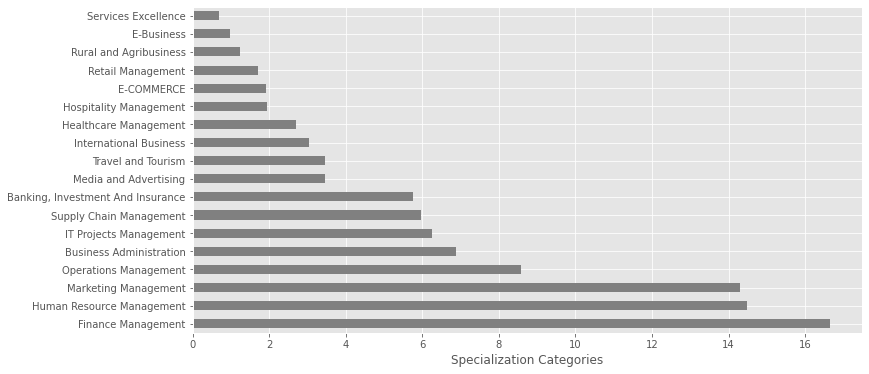

In [390]:
# Lets check for the fields from Task 2 i.e. Specialization
# Now it should not have any category with Select value

# df_leads["Specialization"].value_counts()
# Lets visualize this instead of just checking value_counts, if you wnat to check above come please comment below line and uncomment above

plt.figure(figsize=(12,6))
plt.style.use('ggplot')
(df_leads["Specialization"].value_counts(normalize=True)*100).plot.barh(color='grey')
plt.xlabel("Specialization Categories")
plt.show()

In [391]:
# Note there are not NULL values as well which do not show up in the above plot
df_leads["Specialization"].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

As we can see that now there is no Category with Select field

In [392]:
# Now lets convert for all the Categorical columns we obtained in variable "cols", refer previous step
cols.pop(6) # Removing Specialization as operation for it has already been performed
for col in cols[1:]:
    df_leads[col] = df_leads[col].apply(to_nan)

In [393]:
df_leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Task 4 & 5: Check Missing values & Drop                     
Lets check the missing values in each of the columns and if the column have more than 45% missing value then we will drop it.

In [394]:
df_leads.shape

(9240, 37)

In [395]:
# Lets check total % of missing values in df_leads
round( (df_leads.isnull().sum() / len(df_leads.index))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Columns which have more than 45% Missing values, we will drop such columns. Any column which has more than 45% missing values if gets imputed would result in the column getting highly skewed and would not be meaningful for model building.

In [396]:
df_leads.drop("How did you hear about X Education", axis=1, inplace=True)

In [397]:
# Now if we try to check the same column it will not be there and will result in error
# df_leads["How did you hear about X Education"].head()

# uncomment above line to check, will result in error

In [398]:
# Now lets automate the column dropping process

df_app_null = df_leads.isnull().sum(axis=0)
df_drop_columns = df_app_null[df_app_null[:]!=0]/len(df_leads.index)*100 > 45
df_drop_columns = df_drop_columns[df_drop_columns == True].index.to_list()

df_leads.drop(df_drop_columns,axis = 1,inplace = True)

len(df_leads.columns)

30

In [399]:
# Lets check the Missing values again
round( (df_leads.isnull().sum() / len(df_leads.index))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

So all the columns with more than 45% missing values have been dropped.  

**Business Perspective**                 
Now lets drop the columns which from a business perspective does not hold much value at the time of model building.

Columns to be considered to be dropped from Business Perspective:
1. City: Since the X Education sells online courses hence there is little to no importance of City variable.
2. Tags: Tags are assigned values which describes the current status of any lead. Status of any lead will only change when you initiate a lead.

Lets drop these 2 columns

In [400]:
df_leads.drop("City", axis=1, inplace=True)
df_leads.drop("Tags", axis=1, inplace=True)

#### Task 6 & 7: Highly Skewed Columns and Columns with High Distribution

Now before imputing or dropping any of the fields lets check each column for 
- Highly skewed columns. A column is considered highly skewed if a large portion of it categories is dominatied by a single value. or   
- Columns with very high number of categories with less weightage like 1, 2, 3, etc. to me mergered into Others.

Here we will check all the remaining columns one by one, except for
1. Prospect ID
2. Lead Number
3. Converted

Since 1 & 2 have unique records and 3 is our target variable, so we will ignore them.                 
Also, we will check this for only the Categorical Variables.

In [401]:
# Lets obtain all the columns which are object type
df_columns = pd.DataFrame(df_leads.dtypes)     #Get the DataTypes
df_columns = df_columns.reset_index()          #reset index
df_columns.columns = ["Field", "DataType"]
cols = df_columns.loc[df_columns["DataType"] == "object" ,"Field"].to_list()[1:]
cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

`Lead Origin`

In [402]:
df_leads["Lead Origin"].value_counts(normalize=True)*100
# this will show all the categories in the column

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

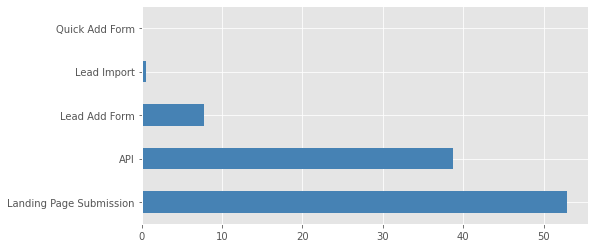

In [403]:
# Visualizing the above information
plt.figure(figsize=(8,4))
plt.style.use('ggplot')
(df_leads["Lead Origin"].value_counts(normalize=True)*100).plot.barh(color="steelblue")
plt.show()

We know that there are 0 NULL value in the columns hence we can merge Lead Add Form, Lead Import and Quick Add Form into single category i.e. "Other"              
This is also required because currently these values have very less distribution in the dataset hence individually they dont potray so much information.

In [404]:
df_leads["Lead Origin"]=df_leads["Lead Origin"].replace(to_replace=['Lead Add Form', 'Lead Import', "Quick Add Form"],value= 'Other') #
# For now we are doing this manually later we will create a method to do this

In [405]:
# Now if we check this again
df_leads["Lead Origin"].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Other                       8.376623
Name: Lead Origin, dtype: float64

`Lead Source`

has 0.39% of NULL values lets check if it is skewed or not.

In [406]:
df_leads["Lead Source"].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
welearnblog_Home      0.010865
NC_EDM                0.010865
blog                  0.010865
Pay per Click Ads     0.010865
youtubechannel        0.010865
testone               0.010865
WeLearn               0.010865
Name: Lead Source, dtype: float64

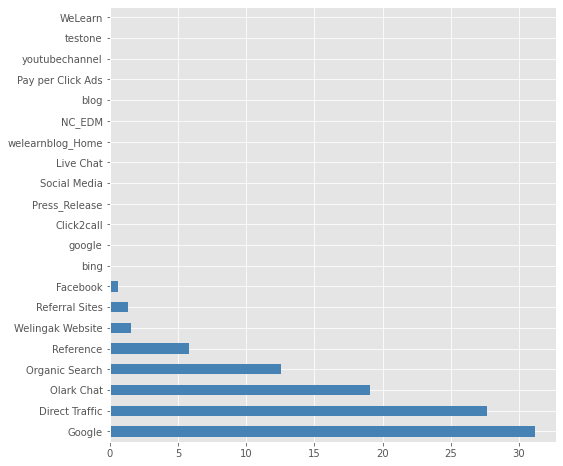

In [407]:
# Visualizing the above information
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
(df_leads["Lead Source"].value_counts(normalize=True)*100).plot.barh(color="steelblue")
plt.show()

Here we can see that there are many fields with very small weightage, lets merge then into a single Field i.e. Other

In [408]:
# Lets create a method to handle this conversion
def merge_to_others(col, merge_threshold, bool_norm):
    '''
    Here col is the columns on which merge needs to be performed
    cols_to_merge is the columns which needs to be merged
    merge_threshold is the limit below which all the columns needs to be merged into one
    bool_norm check if we want to check relative weightage of fields or absolute
    '''
    global df_leads
    if(bool_norm):
        cols_to_merge = pd.DataFrame(df_leads[col].value_counts(normalize=True))
    else:
        cols_to_merge = pd.DataFrame(df_leads[col].value_counts()/len(df_leads.index))
    cols_to_merge = cols_to_merge[col] < merge_threshold
    cols_to_merge = cols_to_merge[cols_to_merge].index.to_list()
    df_leads[col]=df_leads[col].replace(to_replace=cols_to_merge,value= 'Other')
    

#Lets trigger this method
merge_to_others("Lead Source", 0.05, True)

# Again check the category distribution
round(df_leads["Lead Source"].value_counts(normalize=True)*100, 2)

Google            31.16
Direct Traffic    27.63
Olark Chat        19.07
Organic Search    12.54
Reference          5.80
Other              3.80
Name: Lead Source, dtype: float64

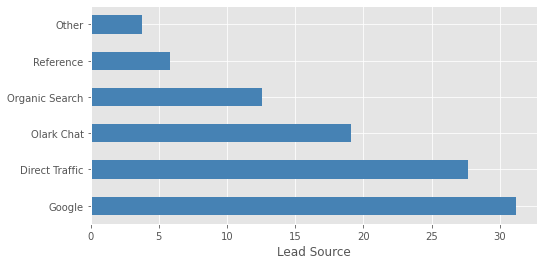

In [409]:
# Visualizing the above information
plt.figure(figsize=(8,4))
plt.style.use('ggplot')
(df_leads["Lead Source"].value_counts(normalize=True)*100).plot.barh(color="steelblue")
plt.xlabel("Lead Source")
plt.show()

here for simplicity we are treating Google and google are 2 different categories. We could have merged it into one as well but for now we will proceed as such.                
Also, missing value imputation would be done later.

`Do Not Email`: Has no NULL values

In [410]:
round(df_leads["Do Not Email"].value_counts(normalize=True)*100,2)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

Here we can see that almost 92% of the data represent a single category i.e. No, hence we can consider this to he highly skewed and hence we can drop this column as it wont provide correct/valid information for model building.

In [411]:
# Dropping Do Not Email column
df_leads.drop("Do Not Email", axis=1, inplace=True)

`Do Not Call`: has no Null values

In [412]:
# Check categories
round(df_leads["Do Not Call"].value_counts(normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

Again, similar to Do Not Email here Do Not Call has almost 100% values in one category hence we will drop this.

In [413]:
# Dropping Do Not Call column
df_leads.drop("Do Not Call", axis=1, inplace=True)

`Converted`: Converted as mentioned in the Data Disctionary is the target variable.

In [414]:
df_leads["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

here 0 is not converted and 1 is Converted

`Last Activity`: Has 1.11% null values

In [415]:
# Check categories
round(df_leads["Last Activity"].value_counts(normalize=True)*100,2)

Email Opened                    37.62
SMS Sent                        30.04
Olark Chat Conversation         10.65
Page Visited on Website          7.00
Converted to Lead                4.68
Email Bounced                    3.57
Email Link Clicked               2.92
Form Submitted on Website        1.27
Unreachable                      1.02
Unsubscribed                     0.67
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.07
Email Received                   0.02
Email Marked Spam                0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

So even if we will impute the missing value with Mode since it is categorical (imputation will be done in later stage).                  
Mode value + 1.11% of Null still does not skew this column or create imbalance towards one category, so here we can merge few categories into Other.

In [416]:
#Lets trigger this merge method (define in Lead Source part)
# Merging all the categories less than 2.5%
merge_to_others("Last Activity", 0.025, True)

# Again check the category distribution
round(df_leads["Last Activity"].value_counts(normalize=True)*100, 2)

Email Opened               37.62
SMS Sent                   30.04
Olark Chat Conversation    10.65
Page Visited on Website     7.00
Converted to Lead           4.68
Email Bounced               3.57
Other                       3.51
Email Link Clicked          2.92
Name: Last Activity, dtype: float64

`Country`: Has 26.63% Null values

In [417]:
# Check categories
round(df_leads["Country"].value_counts()/len(df_leads.index)*100,2)

# Not using the normalize attribute as there are missing values as well

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Nigeria                  0.04
Kuwait                   0.04
Canada                   0.04
South Africa             0.04
Germany                  0.04
Sweden                   0.03
Bangladesh               0.02
Italy                    0.02
China                    0.02
Netherlands              0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Philippines              0.02
Belgium                  0.02
Ghana                    0.02
Denmark                  0.01
Russia                   0.01
Kenya                    0.01
Indonesia                0.01
Vietnam                  0.01
Tanzania  

Here we can see that 70% of the data is represented by 1 category and since this is the Mode as well hence when we would have imputed the column then,                   
26.63% Missing would be replaced by India hence changing it to almost 97% data in one category.                
This will result in imbalance in the variable, Hence we will drop this column.

In [418]:
# Dropping column
df_leads.drop("Country", axis=1, inplace=True)

`Specialization`: Almost 37% missing values

In [419]:
# Check categories
round(df_leads["Specialization"].value_counts()/len(df_leads.index)*100,2)

# not using normalized=True as want to check what is the percentage of category considering Missing Values

Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

As we can see that the column is not skewed hence we can merge the values. Also if we add 37% Missing Value to Mode i.e. Finance Management with 10.56 then also the Columns does not become skewed.

Since most of the values are small hence we merge with a threshold of 0.04 or 4% and less

In [420]:
#Lets trigger this merge method (define in Lead Source part)
merge_to_others("Specialization", 0.035, False)

# Again check the category distribution
round(df_leads["Specialization"].value_counts()/len(df_leads.index)*100, 2)

Other                                13.41
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Name: Specialization, dtype: float64

`'What is your current occupation'`: Almost 29% NULL value

In [421]:
# Check categories
round(df_leads['What is your current occupation'].value_counts()/len(df_leads.index)*100,2)

# not using normalized=True as want to check what is the percentage of category considering Missing Values

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

Here we can see that this variable has almost 29% missing value and if we impute the missing value with Mode then it would eventually make this variable imbalanced.             
Also from an Business point of view this variable hold key information as based upon the occupation the team can determine the value of this customer.                    
Hence we will not drop this column and during imputation we will impute the missing values with Other hence representing that the user or lead did not wish to specify the information.

In [422]:
#Lets trigger this merge method (define in Lead Source part)
# Merge categories with 2% or less weightage in the variable
merge_to_others("What is your current occupation", 0.02, False)

# Again check the category distribution
round(df_leads["What is your current occupation"].value_counts()/len(df_leads.index)*100, 2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.37
Name: What is your current occupation, dtype: float64

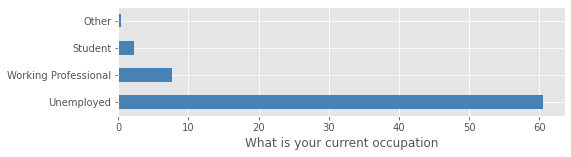

In [423]:
# Visualizing the above information
plt.figure(figsize=(8,2))
plt.style.use('ggplot')
(df_leads["What is your current occupation"].value_counts()/len(df_leads.index)*100).plot.barh(color="steelblue")
plt.xlabel("What is your current occupation")
plt.show()

`What matters most to you in choosing a course`: 29.32% Missing values

In [424]:
# Check categories
round(df_leads['What matters most to you in choosing a course'].value_counts()/len(df_leads.index)*100,2)

# not using normalized=True as want to check what is the percentage of category considering Missing Values

Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

Again during imputation when missing value is replaced with mode it will result in making the category "Better Career Prospects" as 70.65+29.32 = apprx 90%.                 
This will result in the column being highly skewed, hence we will drop this columns.

but Again similar to "What is your current occupation", here also not having a value or keeping missing values as Other is a better representation of the Missing values instead of imputing with mode.

In [425]:
#Lets trigger this merge method (define in Lead Source part)
# Merge categories with 5% or less weightage in the variable
merge_to_others("What matters most to you in choosing a course", 0.05, False)

# Again check the category distribution
round(df_leads["What matters most to you in choosing a course"].value_counts()/len(df_leads.index)*100, 2)

Better Career Prospects    70.65
Other                       0.03
Name: What matters most to you in choosing a course, dtype: float64

`Search`: No missing value

In [426]:
# Check categories
round(df_leads['Search'].value_counts(normalize=True)*100,2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [427]:
# Dropping the column as it is highly skewed to one value
df_leads.drop('Search', axis=1, inplace=True)

`Magazine`: No missing values

In [428]:
# Check categories
round(df_leads['Magazine'].value_counts(normalize=True)*100,2)

No    100.0
Name: Magazine, dtype: float64

In [429]:
# Dropping as it has only 1 value and hence wont be only any meaning
df_leads.drop('Magazine', axis=1, inplace=True)

`Newspaper Article`: No Missing Value

In [430]:
# Check categories
round(df_leads['Newspaper Article'].value_counts(normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [431]:
# Dropping the column as it is highly skewed to one value
df_leads.drop('Newspaper Article', axis=1, inplace=True)

`X Education Forums`: No missing value

In [432]:
# Check categories
round(df_leads['X Education Forums'].value_counts(normalize=True)*100,2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [433]:
# Dropping the column as it is highly skewed to one value
df_leads.drop('X Education Forums', axis=1, inplace=True)

`Newspaper`: No Missing values

In [434]:
# Check categories
round(df_leads['Newspaper'].value_counts(normalize=True)*100,2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [435]:
# Dropping the column as it is highly skewed to one value
df_leads.drop('Newspaper', axis=1, inplace=True)

`Digital Advertisement`: No missing values

In [436]:
# Check categories
round(df_leads['Digital Advertisement'].value_counts(normalize=True)*100,2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [437]:
# Dropping the column as it is highly skewed to one value
df_leads.drop('Digital Advertisement', axis=1, inplace=True)

`Through Recommendations`: No missing values

In [438]:
# Check categories
round(df_leads['Through Recommendations'].value_counts(normalize=True)*100,2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [439]:
# Dropping the column as it is highly skewed to one value
df_leads.drop('Through Recommendations', axis=1, inplace=True)

`Receive More Updates About Our Courses`: No Missing Value

In [440]:
# Check categories
round(df_leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100,2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [441]:
# Dropping the column as it has only one value and wont be meaningful for model building
df_leads.drop('Receive More Updates About Our Courses', axis=1, inplace=True)

`Update me on Supply Chain Content`: No missing value

In [442]:
# Check categories
round(df_leads['Update me on Supply Chain Content'].value_counts(normalize=True)*100,2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [443]:
# Dropping the column as it has only one value and wont be meaningful for model building
df_leads.drop('Update me on Supply Chain Content', axis=1, inplace=True)

`Get updates on DM Content`: No missing value

In [444]:
# Check categories
round(df_leads['Get updates on DM Content'].value_counts(normalize=True)*100,2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [445]:
# Dropping the column as it has only one value and wont be meaningful for model building
df_leads.drop('Get updates on DM Content', axis=1, inplace=True)

`I agree to pay the amount through cheque`: No missing values

In [446]:
# Check categories
round(df_leads['I agree to pay the amount through cheque'].value_counts(normalize=True)*100,2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [447]:
# Dropping the column as it has only one value and wont be meaningful for model building
df_leads.drop('I agree to pay the amount through cheque', axis=1, inplace=True)

`A free copy of Mastering The Interview`: No missing values

In [448]:
# Check categories
round(df_leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100,2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

Since the column does not seem to be skewed or has missign value, hence no operation requires from data cleaning perspective.

`Last Notable Activity`: No missing value

In [449]:
# Check categories
round(df_leads['Last Notable Activity'].value_counts(normalize=True)*100,2)

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Resubscribed to emails           0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

Lets merge the columns with very low weightage onto Other

In [450]:
#Lets trigger this merge method (define in Lead Source part)
merge_to_others("Last Notable Activity", 0.03, True)

# Again check the category distribution
round(df_leads["Last Notable Activity"].value_counts()/len(df_leads.index)*100, 2)

Modified                   36.87
Email Opened               30.60
SMS Sent                   23.51
Other                       5.58
Page Visited on Website     3.44
Name: Last Notable Activity, dtype: float64

#### Task 8: Imputing Missing Values                      
lets again check how many missing values are left..

In [451]:
round(df_leads.isnull().sum()/len(df_leads.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

**Lead Source**

In [452]:
df_leads["Lead Source"].dtype

dtype('O')

hence we will impute the missing values with the Mode

In [453]:
val_mode = df_leads["Lead Source"].mode()
df_leads["Lead Source"] = df_leads["Lead Source"].fillna(val_mode[0])

In [454]:
df_leads["Lead Source"].isnull().sum()

0

**TotalVisits**

In [455]:
df_leads["TotalVisits"].dtype

dtype('float64')

In [456]:
# Since it is numeric we can use Mean or Median for imputation
# lets check both with extreme values
df_leads["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

We can see that the max value is very high compared to 75th percentile.. this indicates that there is possibility that outliers are present in the column.                  
Hence will compute with Median as mean is very much affected by outliers.

In [457]:
val_median = df_leads["TotalVisits"].median()
df_leads["TotalVisits"] = df_leads["TotalVisits"].fillna(val_median)
df_leads["TotalVisits"].isnull().sum()

# So now it will have no null values

0

**Page Views Per Visit**

In [458]:
df_leads["Page Views Per Visit"].dtype

dtype('float64')

In [459]:
# Since it is numeric we can use Mean or Median for imputation
# lets check both with extreme values
df_leads["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

We can see that the max value is higher compared to 75th percentile.. this indicates that there is possibility that outliers are present in the column.                  
Hence will compute with Median as mean is very much affected by outliers.

In [460]:
val_median = df_leads["Page Views Per Visit"].median()
df_leads["Page Views Per Visit"] = df_leads["Page Views Per Visit"].fillna(val_median)
df_leads["Page Views Per Visit"].isnull().sum()

# So now it will have no null values

0

**Last Activity**

In [461]:
df_leads["Last Activity"].dtype

dtype('O')

hence we will impute the missing values with the Mode

In [462]:
val_mode = df_leads["Last Activity"].mode()
df_leads["Last Activity"] = df_leads["Last Activity"].fillna(val_mode[0])
df_leads["Last Activity"].isnull().sum()
# So now it will have no null values

0

**Specialization**

In [463]:
df_leads["Specialization"].dtype

dtype('O')

In [464]:
df_leads["Specialization"].value_counts()/len(df_leads.index)*100

Other                                13.409091
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Name: Specialization, dtype: float64

At 1st glace it seems like imputing with mode value makes most sense but if we think from business perspective imputing with Mode would result in incorrect representation of the variable, here we can impute the missign values using the "Unknown" class method i.e. retaining the categorical feature’s missing-ness itself. Here we will impute it with "Other"

In [465]:
# val_mode = df_leads["Specialization"].mode()
# df_leads["Specialization"] = df_leads["Specialization"].fillna(val_mode[0])
df_leads["Specialization"] = df_leads["Specialization"].fillna("Other")
df_leads["Specialization"].isnull().sum()
# So now it will have no null values

0

**What is your current occupation**

In [466]:
df_leads["What is your current occupation"].dtype

dtype('O')

In [467]:
df_leads["What is your current occupation"].value_counts()/len(df_leads.index)*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.367965
Name: What is your current occupation, dtype: float64

At 1st glace it seems like imputing with mode value makes most sense but if we think from business perspective imputing with Mode would result in incorrect representation of the variable, here we can impute the missign values using the "Unknown" class method i.e. retaining the categorical feature’s missing-ness itself. Here we will impute it with "Other"

In [468]:
df_leads["What is your current occupation"] = df_leads["What is your current occupation"].fillna("Other")
df_leads["What is your current occupation"].isnull().sum()
# So now it will have no null values

0

**What matters most to you in choosing a course**

In [469]:
df_leads["What matters most to you in choosing a course"].dtype

dtype('O')

In [470]:
df_leads["What matters most to you in choosing a course"].value_counts()/len(df_leads.index)*100

Better Career Prospects    70.649351
Other                       0.032468
Name: What matters most to you in choosing a course, dtype: float64

At 1st glace it seems like imputing with mode value makes most sense but if we think from business perspective imputing with Mode would result in incorrect representation of the variable, here we can impute the missign values using the "Unknown" class method i.e. retaining the categorical feature’s missing-ness itself. Here we will impute it with "Other"

In [471]:
df_leads["What matters most to you in choosing a course"] = df_leads["What matters most to you in choosing a course"].fillna("Other")
df_leads["What matters most to you in choosing a course"].isnull().sum()
# So now it will have no null values

0

Finally lets check the Null values again

In [472]:
df_leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

Now there are no Null values.

Since there are no NULL values hence no need to check the ROW Wise Null Values.

So after doing NULL value checks, lets see how many rows we still have. Since we didnt delete any rows hence we will still have all the rows.

In [473]:
df_leads.shape

(9240, 14)

#### Outlier Treatment

lets check if there are any outliers present in the Numeric Fields of the dataset.

In [474]:
cols = pd.DataFrame(df_leads.dtypes).reset_index()     # Get the DataTypes
cols = cols[cols[0] != "object"]["index"].to_list()[2:]     # Converted is Binary column and Lead Number holds no meaning
# cols have all the numerical fields now
cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

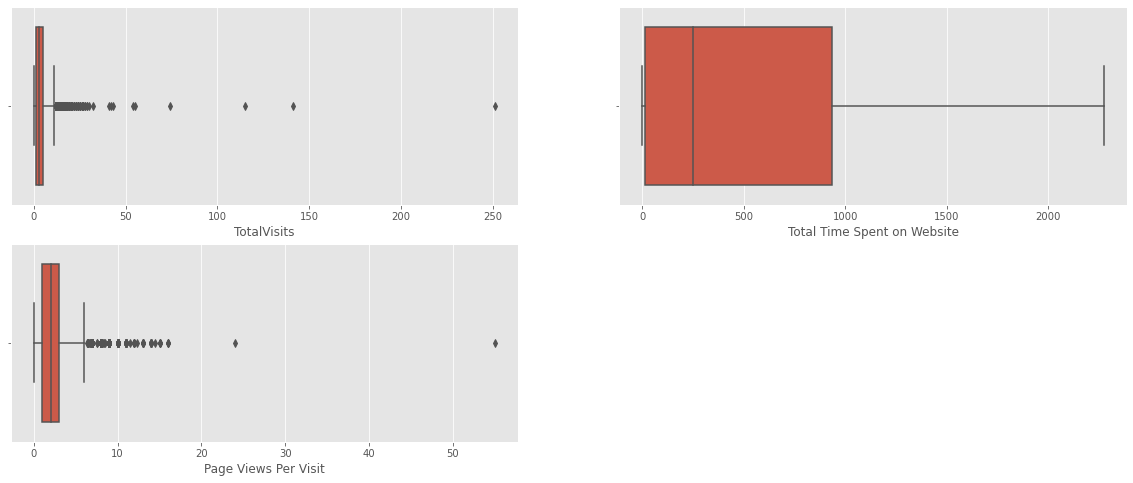

In [475]:
# Lets Visualize if there are any outliers
plt.figure(figsize=(20,8))
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df_leads[i[1]])
plt.show()

So we can see that TotalVisits and Page Views Per Visit have outliers, lets cap then with the 95th %tile.

In [476]:
cols = ["TotalVisits", "Page Views Per Visit"]

for col in cols:
    q95 = df_leads[col].quantile(0.95)
    df_leads[col][df_leads[col] >= q95] = q95

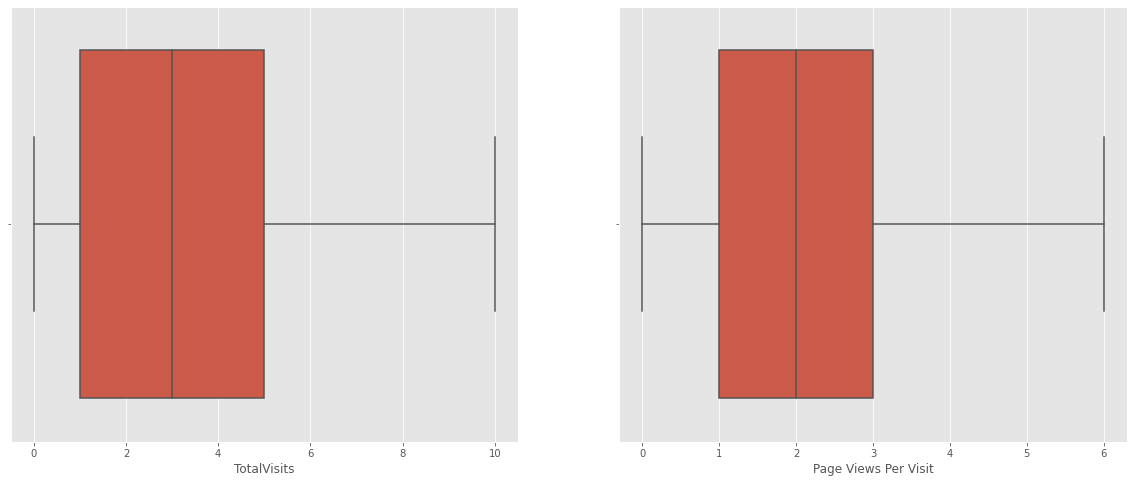

In [477]:
# Lets check the outliers again
cols = ["TotalVisits", "Page Views Per Visit"]
plt.figure(figsize=(20,8))
for i in enumerate(cols):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(df_leads[i[1]])
plt.show()

Hence now there are no outliers as well in the Dataset.

### EDA: Exploratory Data Analysis                       
Lets check some Univariate and Bi-variate analysis to get some inferences into the dataset

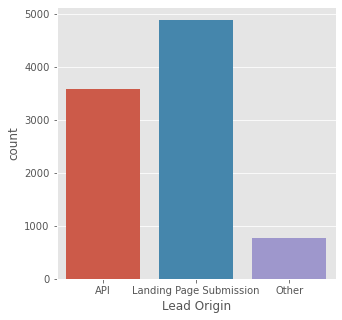

In [478]:
# Lets check Lead Origin
plt.figure(figsize=(5,5))
sns.countplot(x="Lead Origin", data=df_leads)
plt.show()

We could see that all the previous steps of cleaning the datset has now resulted in a much better balanced and unbiased Lead Origin.

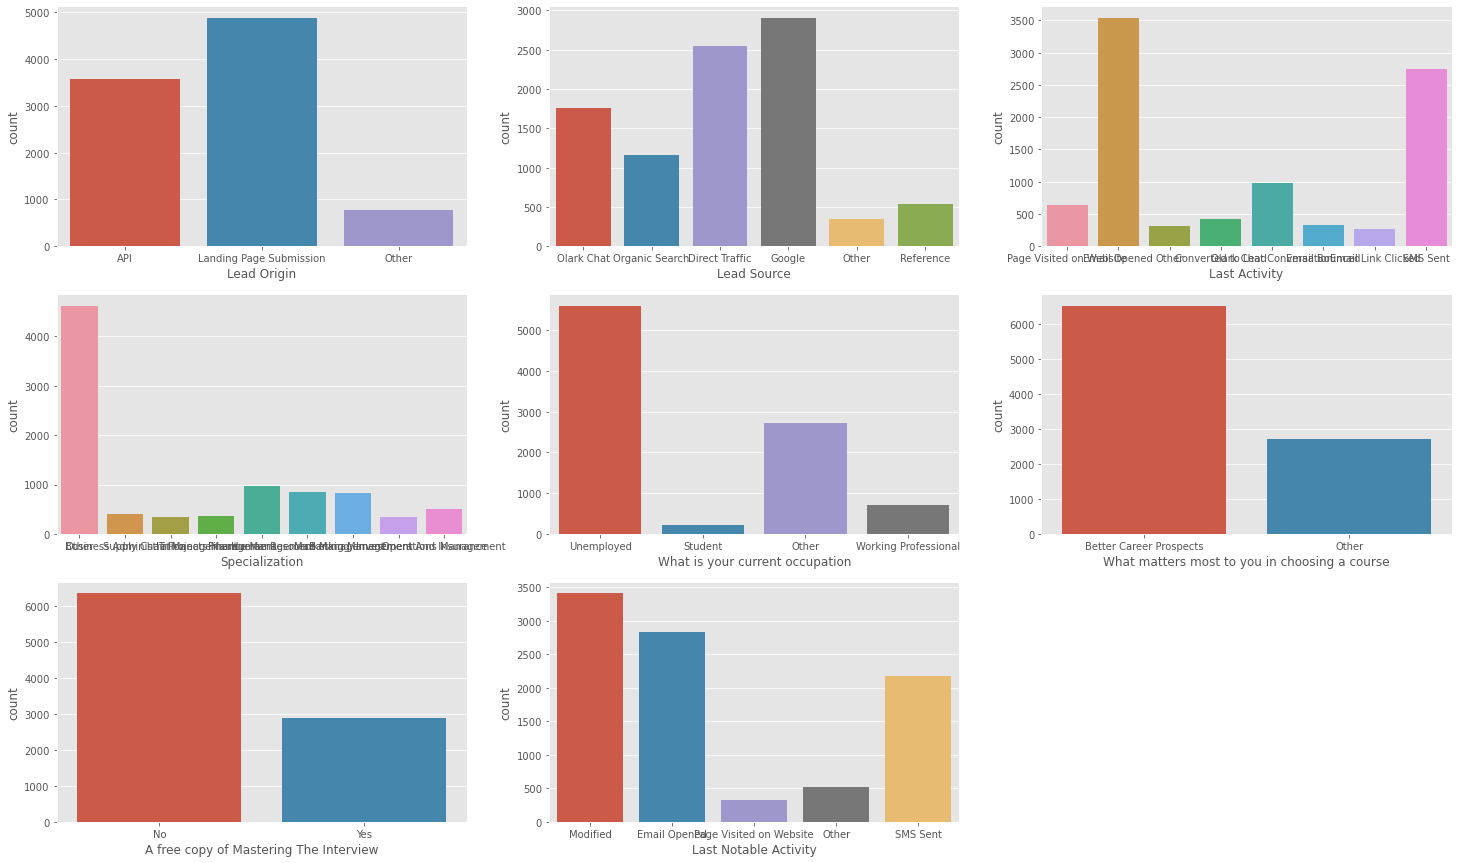

In [479]:
# Lets check the Distribution for all the Categorical Variables
cols = pd.DataFrame(df_leads.dtypes).reset_index()     # Get the DataTypes
cols = cols[cols[0] == "object"]["index"].to_list()[1:] # Converted is Binary column and Lead Number holds no meaning

# NOw lets plot the categorical variables
plt.figure(1, figsize=(25,15))
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x=i[1], data=df_leads)
plt.show()

We can see that all the categorical variables are have categories distributed normally and does not have any imbalance in the dataset itself.

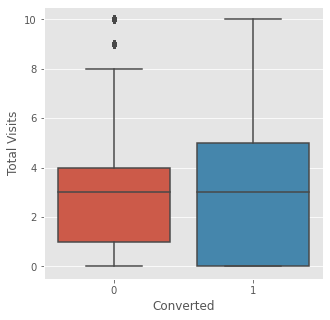

In [480]:
# Lets check TotalVisits and Converted
# What pattern could we see for converted vs not converted in terms of TotalVisits

plt.figure(figsize=(5,5))
sns.boxplot(x="Converted", y="TotalVisits", data=df_leads)
plt.xlabel("Converted")
plt.ylabel("Total Visits")
plt.show()

# Converted: 0 menas not converted and 1 means converted

As per the above plot we can't make any concrete observations as the data seems to be equally distributed. The Median is almost the same, the only difference is that the interquantile range for Converted is greated than not converted.

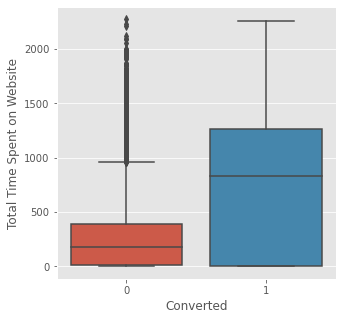

In [481]:
# Lets check Total Time Spent on Website and Converted
# What pattern could we see for converted vs not converted in terms of TotalVisits

plt.figure(figsize=(5,5))
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=df_leads)
plt.xlabel("Converted")
plt.ylabel("Total Time Spent on Website")
plt.show()

# Converted: 0 menas not converted and 1 means converted

So compared to converted, Not converted has a lower median value but the overall distribution of both is almost the same. But on average people who have spend less time on the website are from No converted category.

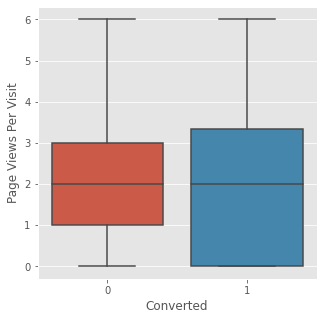

In [482]:
# Lets check Page Views Per Visit
# What pattern could we see for converted vs not converted in terms of TotalVisits

plt.figure(figsize=(5,5))
sns.boxplot(x="Converted", y="Page Views Per Visit", data=df_leads)
plt.xlabel("Converted")
plt.ylabel("Page Views Per Visit")
plt.show()

# Converted: 0 menas not converted and 1 means converted

As per the above plot we can't make any concrete observations as the data seems to be equally distributed. The Median is almost the same, the only difference is that the interquantile range for Converted is greated than not converted.

Lets check few Categorical Variables as well

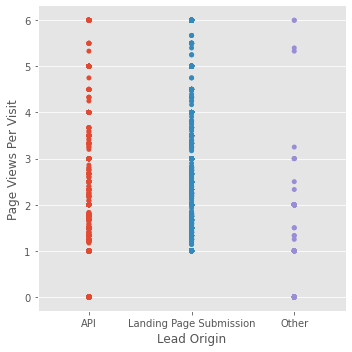

In [483]:
# Lead Origin vs Page Views Per Visit
sns.catplot(x="Lead Origin", y="Page Views Per Visit", jitter=False, data=df_leads);

So the distribution of Page Views Per Visit for each category of Lead Origin is almost the same. Max value is 6 min is 0 for Landing page Submission it is 1.

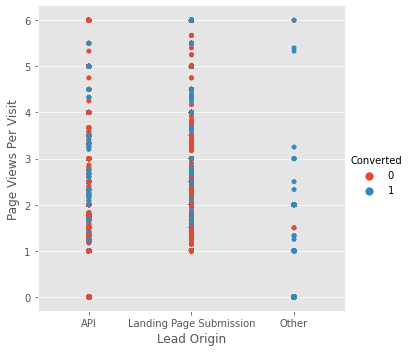

In [484]:
# Lead Origin vs Page Views Per Visit
sns.catplot(x="Lead Origin", y="Page Views Per Visit", hue="Converted", jitter=False, data=df_leads);

Converted 0 means not converted and 1 means converted.               
Here we could see that both converted and not converted are equally distributed in most categories except other, this might be due to the fact that other has less data points compared to other categories.

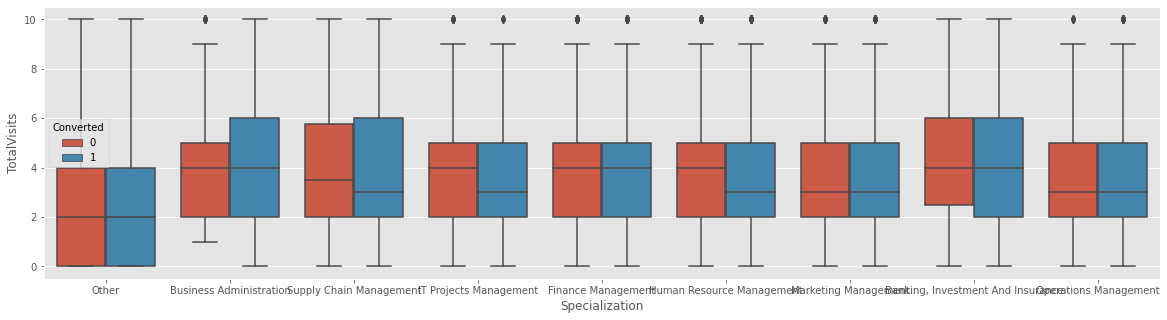

In [485]:
# Lets check Specialization vs TotalVisits for each Converted
plt.figure(figsize=(20,5))
sns.boxplot(x="Specialization", y="TotalVisits", hue="Converted", data=df_leads)
plt.xlabel("Specialization")
plt.ylabel("TotalVisits")
plt.show()

Again the datapoins seems to be equal for most the categories except other and Human Resource Management. In Human Resource Management the Converted have lower number of Total Visist on average.

-------------------------

## Data Preprocessing

Now that the Data Cleaning and EDA part is completed, we will prepare the Dataset to be ready for Model Creation.                
For this we have few pre-processing steps we need to focus upon:
- Step 1: Check Correlation matrix on existing Dataset
- Step 2: Create Dummies
- Step 3: Train-Test Split
- Step 4: Feacture Scaling - Standardization
- Step 5: Multicolleniarity with Dummies

Lets Start with checking the correlation Matrix.. and if any of the variables are hightly correlated we will drop them.


### Step 1: Check Correlation Matrix

In [486]:
# Check Correlation
df_leads.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.048062,0.020329,0.065043
Converted,0.025157,1.000000,0.045568,0.362483,-0.005289
TotalVisits,0.048062,0.045568,1.000000,0.357773,0.767585
Total Time Spent on Website,0.020329,0.362483,0.357773,1.000000,0.360425
Page Views Per Visit,0.065043,-0.005289,0.767585,0.360425,1.000000


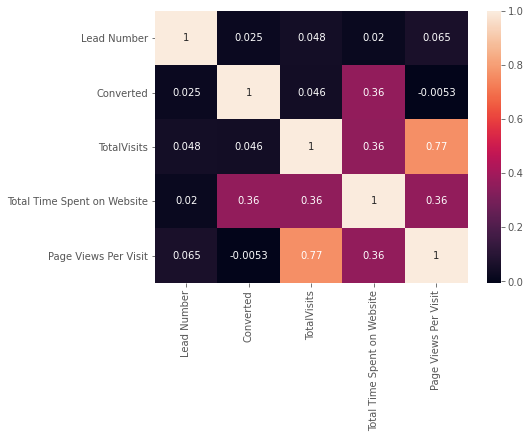

In [487]:
# Let's see the correlation matrix 
plt.figure(figsize = (7,5))        # Size of the figure
sns.heatmap(df_leads.corr(),annot = True)
plt.show()

We can see that TotalVisit and Page Views Per Visit are highly correlated with each other.                
Correlation: 0.768 (approx).                  
So we can keep either of the 2 columns.

In [488]:
df_leads.drop("Page Views Per Visit", axis=1, inplace=True)

In [489]:
# Also Last Notable Activity is very similar to Last Activity from a business point of view hence Dropping this as well
df_leads.drop("Last Notable Activity", axis=1, inplace=True)

now lets proceed with dummy creation...


### Step 2: Dummy Creation:                     
Lets create the dummies now and start with the model building activity.                  


`Explanation`:                
Now if the categorical variable has 4 values, then we need to create 3 dummies for this i.e. N categorical values will have N-1 dummies.            
This is becasue say we have a categorical variable "cat" with value A, B, C and D                
then to represent each value we can use binary notations like A can be 1 0 0 0, B can be 0 1 0 0 similarily C & D can be 0 0 1 0 and 0 0 0 1.                 
So to represent these 4 values we only need 3 binary fileds, say we remove A then
- B -> 1 0 0
- C -> 0 1 0
- D -> 0 0 1

so how does A get represented here, A is represented as 0 0 0.

In [490]:
cols = pd.DataFrame(df_leads.dtypes).reset_index()     # Get the DataTypes
cols = cols[cols[0] == "object"]["index"].to_list()[1:]

# Also, we will remove "A free copy of Mastering The Interview" from the cols list as it is a Binary Column with Yes No values.
cols.pop(6) # A free copy of Mastering The Interview
cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course']

In [491]:
# Lead Origin
pd.get_dummies(df_leads["Lead Origin"]).head()

,API,Landing Page Submission,Other
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


now by default the .get_dummies() method generate N dummy variables to get N-1 dummy variables, we can either
- drop a columns using .drop() method
- or we can use the drop_first=True attribute in the .get_dummies() method

In our case since we specifically want to drop the "Other" Field hence we will manually select the column to be dropped.

In [492]:
df_dummies = pd.get_dummies(df_leads["Lead Origin"])
df_dummies.drop("Other", axis=1, inplace=True)
df_dummies.head()

,API,Landing Page Submission
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [493]:
# lets merge these dummies onto the main DataFrame df_boombike and then remove the redundant variable
df_leads = pd.concat([df_leads, df_dummies], axis=1)
df_leads.drop("Lead Origin", axis=1, inplace=True)
df_leads.head()

,Prospect ID,Lead Number,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,API,Landing Page Submission
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0.0,0,Page Visited on Website,Other,Unemployed,Better Career Prospects,No,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,5.0,674,Email Opened,Other,Unemployed,Better Career Prospects,No,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,1,2.0,1532,Email Opened,Business Administration,Student,Better Career Prospects,Yes,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,1.0,305,Other,Other,Unemployed,Better Career Prospects,No,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,1,2.0,1428,Converted to Lead,Other,Unemployed,Better Career Prospects,No,0,1


Now lets create a method to automate this process

In [494]:
def generate_dummies(col):
    '''
    Here we will pass the column name to the method and then generate dummies.
    Drop Other column from dummies, manually dropping column instead of drop_first=True
    Add the dummies back to df_leads
    Drop passed "col" from df_leads
    '''
    global df_leads
    df_dummies = pd.get_dummies(df_leads[col])
    df_dummies.drop("Other", axis=1, inplace=True)
    df_leads = pd.concat([df_leads, df_dummies], axis=1)
    df_leads.drop(col, axis=1, inplace=True)

In [495]:
# Now lets run this for all the columns we fetched above in cols list
for col in cols[1:]:
    generate_dummies(col)

df_leads.head(3)

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Better Career Prospects
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,No,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,No,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,Yes,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [496]:
# Now lets convert A free copy of Mastering The Interview into 0 and 1
df_leads["A free copy of Mastering The Interview"] = df_leads["A free copy of Mastering The Interview"].apply(lambda x: 0 if x=="No" else 1)
df_leads.head(3)

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Better Career Prospects
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [497]:
# Total columns in the dataset
df_leads.shape

(9240, 32)

Total 32 columns including 1 Target column, then 2 Unique identifiers.. so these 3 are not used to build the model.                  
Hence total 29 independent variables.

### Step 3: Train-Test Split                   
As per the best practices, 70-30 or 80-20 split of dataset between train and test set is considered to be sufficient.                 
Here, I have followed 70-30 split.

- X_train & Y_train -> train set          
- X_test & Y_test -> test set

In [498]:
df = df_leads.copy()
df.set_index("Lead Number", inplace=True)
df.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Better Career Prospects
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
660728,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
660681,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [499]:
# Lets create a new DataFrame
# DataFrame X => All independent variables
# DataFrame Y => Target variable

# Lets set the Lead Number as the index so that later in the Predicted set we can refer to the Original Lead Number instead of index values
df = df_leads.copy()
df.set_index("Lead Number", inplace=True)

X = df.loc[:, "TotalVisits":]  # All columns except Prospect ID, Lead Number and converted
Y = df["Converted"]

print("X Dataframe shape: ", X.shape)
print("Y Dataframe shape: ", Y.shape)

X Dataframe shape:  (9240, 29)
Y Dataframe shape:  (9240,)


In [500]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=200)

### Step 4: Feature Scaling

In [501]:
# create object for scaler
scaler = StandardScaler()

# Scale only the Numerical values i.e. TotalVisits & Total Time Spent on Website
X_train[["TotalVisits", "Total Time Spent on Website"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website"]])

X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Better Career Prospects
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
580221,-1.158753,-0.896237,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
658831,2.477211,2.424346,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
611640,-1.158753,-0.896237,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
631676,-1.158753,-0.896237,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
591022,-1.158753,-0.896237,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [502]:
### Checking the Current Lead Rate
total_leads = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
total_leads

38.53896103896104

### Step 5: Looking at Correlations

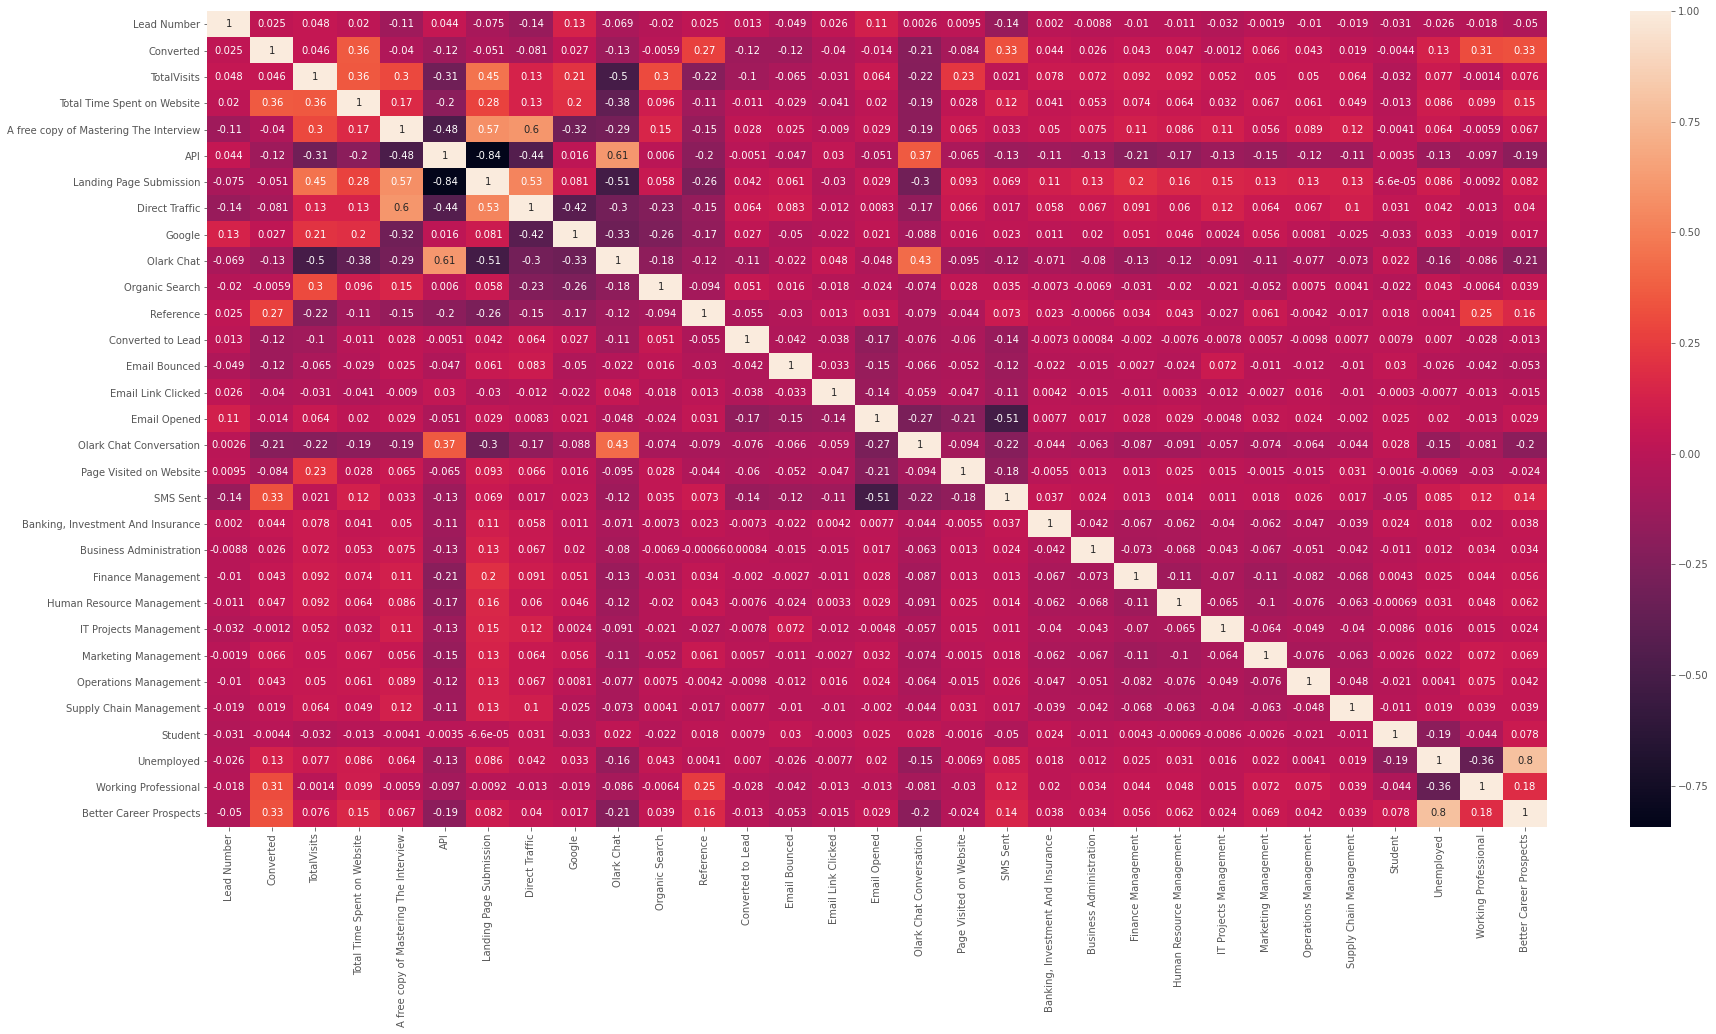

In [503]:
# Let's see the correlation matrix 
# df_leads.corr()

# Lets viszualize it, since the .corr() is too large to be viewed.
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df_leads.corr(),annot = True)
plt.show()

`Observations`:
Here we will consider any field to be highly correlated if it has a factor more than 0.7 (will not consider 0.7 or -0.7 or less)
- API is highly correlated to Landing page Submission with -0.84 correlation coefficient

Hence we can drop either.. we will drop API

In [504]:
X_train.drop("API", axis=1, inplace=True)
X_test.drop("API", axis=1, inplace=True)

After dropping highly correlated variables now let's check the correlation matrix again.

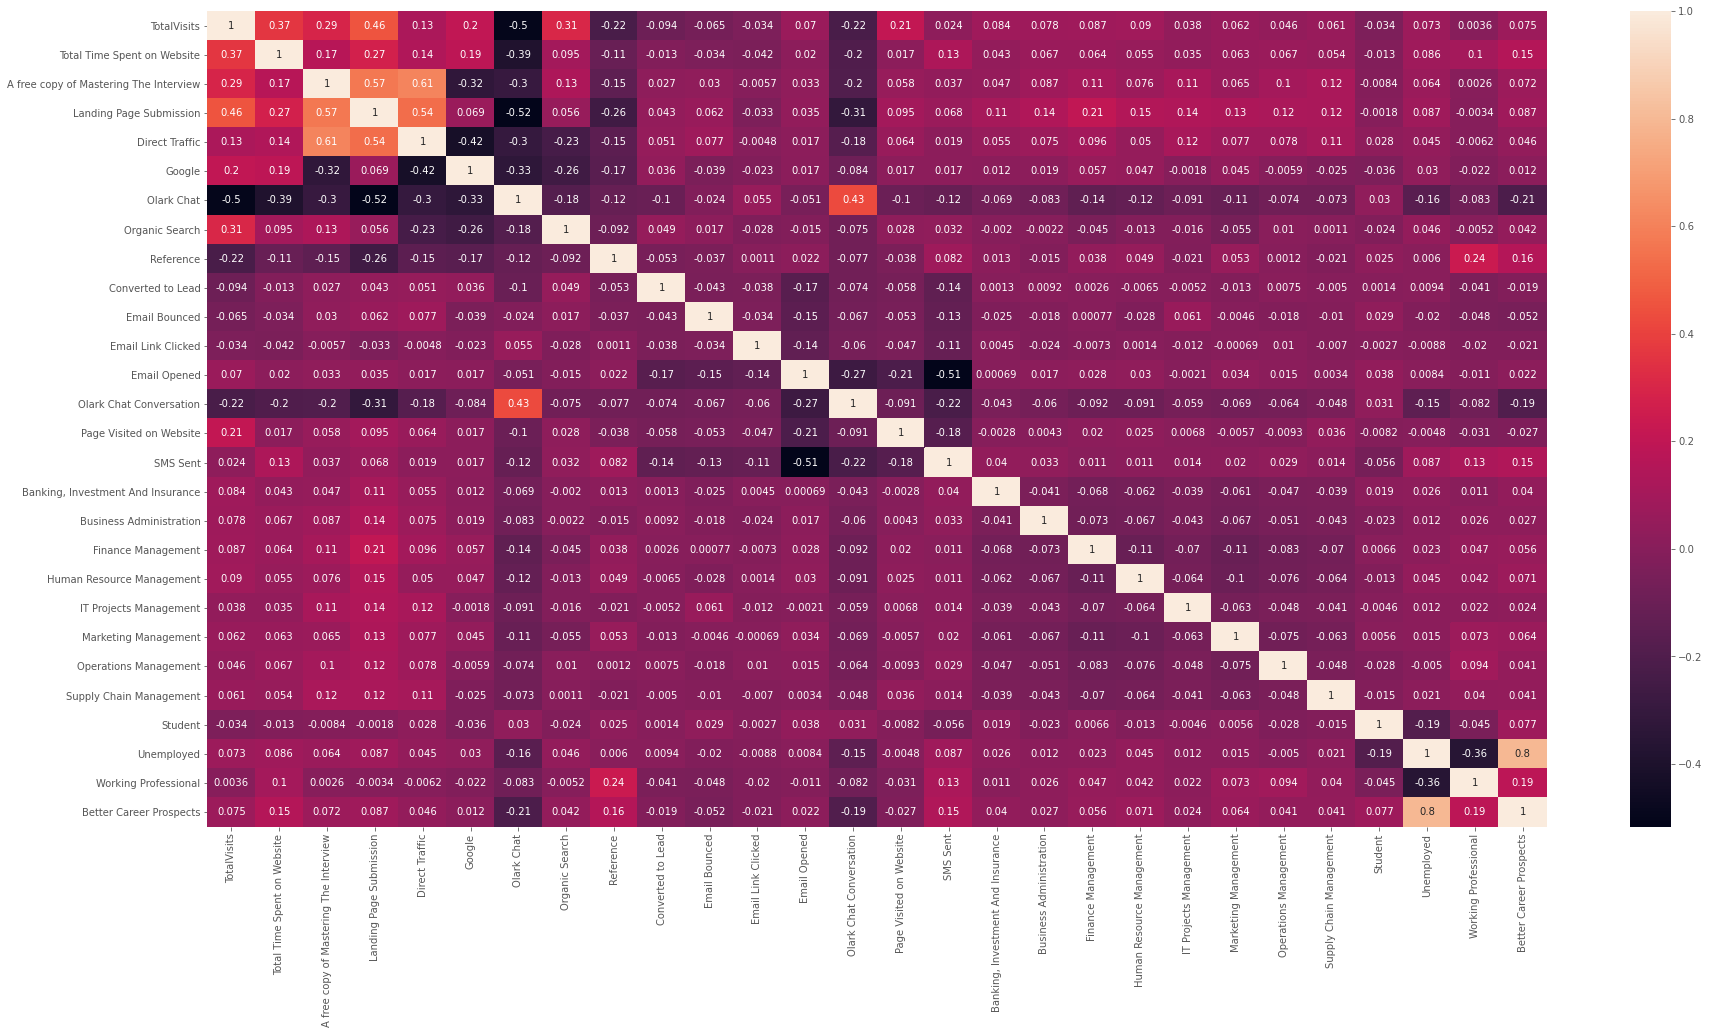

In [505]:
# Lets viszualize it, 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [506]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Better Career Prospects
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
580221,-1.158753,-0.896237,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
658831,2.477211,2.424346,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
611640,-1.158753,-0.896237,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
631676,-1.158753,-0.896237,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
591022,-1.158753,-0.896237,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [507]:
X_train.shape

(6468, 28)

---------------------

## Model Building

### Forward Method

General Steps
- create model object using one or few independent variable
- fit model object
- Evaluate model on parameters using accuracy score, p-value of coefficients and VIF.
- Add more Independent variable and repeat previous steps



Before we start with Model building activity, lets add the constant part to the X_train.  

In [508]:
# lets start with few variable say TotalVisits, Landing Page Submission, Finance Management

X_train_sm = sm.add_constant(X_train["TotalVisits"])
X_train_sm.head()

,const,TotalVisits
Lead Number,,
580221,1.0,-1.158753
658831,1.0,2.477211
611640,1.0,-1.158753
631676,1.0,-1.158753
591022,1.0,-1.158753


`Iteration 1`:

In [509]:
# Logistic regression model
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6466
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4305.2
Date:                Mon, 07 Sep 2020   Deviance:                       8610.4
Time:                        16:14:34   Pearson chi2:                 6.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4669      0.026    -18.253      0.000      -0.517      -0.417
TotalVisits     0.0968      0.025      3.811      0.000       0.047       0.147
===============================================================================
"""

The pValue of the independent variable is valid

In [510]:
# Getting the predicted values on the train set
Y_train_pred_m1 = logReg_m1.predict(X_train_sm)
Y_train_pred_m1 = Y_train_pred_m1.values.reshape(-1)

# Creating a dataframe with the actual Lead flag and the predicted probabilities
# We will now create a dataframe containing the actual **Converted** variable and the predicted conversion probability.
Y_train_pred_m1 = pd.DataFrame({'Actual_Lead':Y_train.values, 'Lead_Prob':Y_train_pred_m1})
Y_train_pred_m1['Lead Number'] = Y_train.index
Y_train_pred_m1.head()

,Actual_Lead,Lead_Prob,Lead Number
0,1,0.35914,580221
1,1,0.44348,658831
2,1,0.35914,611640
3,0,0.35914,631676
4,0,0.35914,591022


Now lets create a new Column "Predicted_Lead", this will be based upon the Lead Probability.                
In order to get a starting point on evaluating the predictive power of the model, we will start with a probability threshold of 0.5 - above this value, the customer is predicted to convert ("Predicted_Lead" = 1). The optimum probability threshold will be calculated once we close in on the final version of the model.

In [511]:
Y_train_pred_m1['Predicted_Lead'] = Y_train_pred_m1["Lead_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_m1.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead
0,1,0.35914,580221,0
1,1,0.44348,658831,0
2,1,0.35914,611640,0
3,0,0.35914,631676,0
4,0,0.35914,591022,0


In [512]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print(confusion)

[[3974    0]
 [2494    0]]


In [513]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']))

0.6144094001236858


Clearly, the predictive power of this model is insignificant as it can be seen from the matrix that it was unable to predict any of the conversions. We will move on to the next iteration and repeat the above steps.

In the next few iterations, we expect parts of the process to be repetitive. We will be able to save time by creating and using the below methods (functions).

In [514]:
# Before moving ahead lets create methods for repetitive tasks

# Predict Lead
def predict_lead(X_train_sm, model_used, cut_off_threshold):
    '''
    Step 1: Predict the Y values using the X_train_sm passed and the model being used (model_used)
    Step 2: Reshape the Y_train_pred
    Step 3: Creating a dataframe with the actual Lead flag and the predicted probabilities
    Step 4: Predicting Lead based upon passed threshold
    Finally return the created DataFrame
    '''
    Y_train_pred = model_used.predict(X_train_sm)
    Y_train_pred = Y_train_pred.values.reshape(-1)
    Y_train_pred = pd.DataFrame({'Actual_Lead':Y_train.values, 'Lead_Prob':Y_train_pred})
    Y_train_pred['Lead Number'] = Y_train.index
    Y_train_pred['Predicted_Lead'] = Y_train_pred["Lead_Prob"].map(lambda x: 1 if x > cut_off_threshold else 0)
    return(Y_train_pred)


# Display VIF
def display_VIF(X_train, cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
def display_Sensitivity(confusion):
    TP = confusion[1,1] # true positive 
    FN = confusion[1,0] # false negatives
    print("Sensitivity", round(TP / float(TP+FN),2))
    
def display_Specificity(confusion):
    TN = confusion[0,0] # true positive 
    FP = confusion[0,1] # false negatives
    print("Specificity", round(TN / float(TN+FP),2))

`Iteration 2`: Adding feature **'Total Time Spent on Website'**

In [515]:
cols = ['TotalVisits','Total Time Spent on Website']

In [516]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6465
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3821.6
Date:                Mon, 07 Sep 2020   Deviance:                       7643.1
Time:                        16:14:34   Pearson chi2:                 6.53e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5019      0.028    -18.097      0.000      -0.556      -0.448
TotalVisits                    -0.2489      0.031     -7.986      0.000      -0.310      -0.188
Total Time Spent on Website     0.9024      0.032     28.578      0.000       0.840       0.964
===============================================================================================
"""

Now we can see that the p-value for few fields is very high. So we will have to discard those fileds.

**Condition for discarding fields**:
- high p-value & high vif -> drop and rebuild
- high p-value & low vif -> drop and rebuild
- low p-value & high vif -> check if previous 2 can be dropped, if yes then drop them else drop this
- low p-vlaue & low vif -> ok, not to be dropped

any p-value higher than 0.05 and any vif value higher than 5 is considered as high.             
Only 1 Field dropped at a time.

Lets check the VIF before dropping.

In [517]:
display_VIF(X_train, cols)

                      Features   VIF
0                  TotalVisits  1.15
1  Total Time Spent on Website  1.15


pValues and VIF are within the acceptable threshold.

In [518]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3448  526]
 [1290 1204]]
Overall Accuracy 0.72
Sensitivity 0.48
Specificity 0.87


We can now see that there is a sizeable number of correct predictions being made. The Specificity is satisfactory but Sensitivity is far from it. We will now move to the next iteration.

`Iteration 3`: Adding feature **"Unemployed"**

In [519]:
cols = ['TotalVisits','Total Time Spent on Website','Unemployed']

In [520]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6464
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3786.1
Date:                Mon, 07 Sep 2020   Deviance:                       7572.2
Time:                        16:14:34   Pearson chi2:                 6.52e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7995      0.046    -17.416      0.000      -0.889      -0.710
TotalVisits                    -0.2620      0.031     -8.345      0.000      -0.323      -0.200
Total Time Spent on Website     0.8973      0.032     28.246      0.000       0.835       0.960
Unemployed                      0.4832      0.058      8.356      0.000       0.370       0.597
===============================================================================================
"""

In [521]:
display_VIF(X_train, cols)

                      Features   VIF
0                  TotalVisits  1.16
1  Total Time Spent on Website  1.16
2                   Unemployed  1.00


pValues and VIF are within the acceptable threshold.

In [522]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3458  516]
 [1302 1192]]
Overall Accuracy 0.72
Sensitivity 0.48
Specificity 0.87


pValues and VIF are within acceptable range. Sensitivity & Specificity are pretty much the same indicating that the new feature did not make a difference in predictive power.

`Iteration 4`: Adding **"Email Link Clicked"**

In [523]:
cols = ['TotalVisits','Total Time Spent on Website','Unemployed', "Email Link Clicked"]

In [524]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6463
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3782.7
Date:                Mon, 07 Sep 2020   Deviance:                       7565.4
Time:                        16:14:35   Pearson chi2:                 6.52e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7874      0.046    -17.069      0.000      -0.878      -0.697
TotalVisits                    -0.2633      0.031     -8.382      0.000      -0.325      -0.202
Total Time Spent on Website     0.8956      0.032     28.185      0.000       0.833       0.958
Unemployed                      0.4836      0.058      8.359      0.000       0.370       0.597
Email Link Clicked             -0.4532      0.179     -2.538      0.011      -0.803      -0.103
===============================================================================================
"""

In [525]:
display_VIF(X_train, cols)

                      Features   VIF
0                  TotalVisits  1.16
1  Total Time Spent on Website  1.16
2                   Unemployed  1.02
3           Email Link Clicked  1.02


pValues and VIF are within the acceptable threshold.

In [526]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3459  515]
 [1303 1191]]
Overall Accuracy 0.72
Sensitivity 0.48
Specificity 0.87


Once again, the new variable has barely moved the needle for Sensitivity & Specificity. we will now move to the next iteration.

`Iteration 5`: Adding **"Landing Page Submission"**

In [527]:
cols = ['TotalVisits','Total Time Spent on Website','Unemployed', "Email Link Clicked", "Landing Page Submission"]

In [528]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6462
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3705.4
Date:                Mon, 07 Sep 2020   Deviance:                       7410.8
Time:                        16:14:35   Pearson chi2:                 6.50e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3952      0.056     -7.078      0.000      -0.505      -0.286
TotalVisits                    -0.1137      0.033     -3.406      0.001      -0.179      -0.048
Total Time Spent on Website     0.9702      0.033     29.186      0.000       0.905       1.035
Unemployed                      0.5327      0.059      9.074      0.000       0.418       0.648
Email Link Clicked             -0.4867      0.179     -2.721      0.007      -0.837      -0.136
Landing Page Submission        -0.8030      0.066    -12.196      0.000      -0.932      -0.674
===============================================================================================
"""

In [529]:
display_VIF(X_train, cols)

                      Features   VIF
4      Landing Page Submission  1.82
2                   Unemployed  1.64
0                  TotalVisits  1.28
1  Total Time Spent on Website  1.16
3           Email Link Clicked  1.02


In [530]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3454  520]
 [1325 1169]]
Overall Accuracy 0.71
Sensitivity 0.47
Specificity 0.87


pValues and VIF are within the acceptable threshold but the Accuracy, Sensitivity & Specificity are mostly the same.

`Iteration 6`: Adding **'Direct Traffic'**

In [531]:
cols = ['TotalVisits','Total Time Spent on Website','Unemployed', "Email Link Clicked", "Landing Page Submission", 'Direct Traffic']

In [532]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6461
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3688.2
Date:                Mon, 07 Sep 2020   Deviance:                       7376.4
Time:                        16:14:35   Pearson chi2:                 6.51e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3971      0.056     -7.099      0.000      -0.507      -0.288
TotalVisits                    -0.1468      0.034     -4.303      0.000      -0.214      -0.080
Total Time Spent on Website     0.9837      0.034     29.355      0.000       0.918       1.049
Unemployed                      0.5323      0.059      9.052      0.000       0.417       0.648
Email Link Clicked             -0.4776      0.180     -2.655      0.008      -0.830      -0.125
Landing Page Submission        -0.5696      0.077     -7.436      0.000      -0.720      -0.420
Direct Traffic                 -0.4548      0.078     -5.832      0.000      -0.608      -0.302
===============================================================================================
"""

In [533]:
display_VIF(X_train, cols)

                      Features   VIF
4      Landing Page Submission  2.90
5               Direct Traffic  1.99
2                   Unemployed  1.64
0                  TotalVisits  1.32
1  Total Time Spent on Website  1.17
3           Email Link Clicked  1.02


pValues and VIF are within the acceptable threshold.

In [534]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3463  511]
 [1320 1174]]
Overall Accuracy 0.72
Sensitivity 0.47
Specificity 0.87


pValues and VIF are within the acceptable threshold.Accuracy, Sensitivity & Specificity have improved very slightly. The new variable clearly isn't contributing significantly to the predictive power of the model.

`Iteration 7`: Adding 'Reference'

In [535]:
cols = ['TotalVisits','Total Time Spent on Website','Unemployed', "Email Link Clicked", "Landing Page Submission", 'Direct Traffic', 'Reference']

In [536]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3405.8
Date:                Mon, 07 Sep 2020   Deviance:                       6811.7
Time:                        16:14:35   Pearson chi2:                 6.59e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7061      0.060    -11.691      0.000      -0.824      -0.588
TotalVisits                    -0.0319      0.035     -0.916      0.359      -0.100       0.036
Total Time Spent on Website     1.0337      0.034     30.408      0.000       0.967       1.100
Unemployed                      0.5423      0.062      8.725      0.000       0.421       0.664
Email Link Clicked             -0.5207      0.193     -2.695      0.007      -0.899      -0.142
Landing Page Submission        -0.3669      0.078     -4.675      0.000      -0.521      -0.213
Direct Traffic                 -0.3918      0.079     -4.968      0.000      -0.546      -0.237
Reference                       3.5111      0.200     17.527      0.000       3.118       3.904
===============================================================================================
"""

Post addition of 'Reference',the p-value of 'TotalVisits' is now quite high indicating that the variable is no longer signficant for this model. We will remove this and proceed to calculate VIF and the model's predictive power.

In [537]:
# Dropping column
X_train_sm.drop("TotalVisits", axis=1, inplace=True)
cols.remove("TotalVisits")

`Iteration 7A`:Removing **'TotalVisits'** while keeping feature **'Reference'**

In [538]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6461
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3406.3
Date:                Mon, 07 Sep 2020   Deviance:                       6812.5
Time:                        16:14:35   Pearson chi2:                 6.59e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6960      0.059    -11.715      0.000      -0.812      -0.580
Total Time Spent on Website     1.0255      0.033     31.339      0.000       0.961       1.090
Unemployed                      0.5410      0.062      8.705      0.000       0.419       0.663
Email Link Clicked             -0.5193      0.193     -2.689      0.007      -0.898      -0.141
Landing Page Submission        -0.3933      0.073     -5.386      0.000      -0.536      -0.250
Direct Traffic                 -0.3792      0.078     -4.891      0.000      -0.531      -0.227
Reference                       3.5296      0.199     17.703      0.000       3.139       3.920
===============================================================================================
"""

In [539]:
display_VIF(X_train, cols)

                      Features   VIF
3      Landing Page Submission  2.57
4               Direct Traffic  1.94
1                   Unemployed  1.68
5                    Reference  1.07
0  Total Time Spent on Website  1.06
2           Email Link Clicked  1.02


pValues and VIF are within the acceptable threshold.

In [540]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3469  505]
 [1046 1448]]
Overall Accuracy 0.76
Sensitivity 0.58
Specificity 0.87


Accuracy has improved by nearly 5% while Specificity is steady. What was notable was Sensitivity which increased from 47% to 58% which is quite significant. We will continue to iterate on top of this model to improve predicitive power.

`Iteration 8`: Adding **"Working Professional"**

In [541]:
cols.append("Working Professional")

In [542]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3067.5
Date:                Mon, 07 Sep 2020   Deviance:                       6135.0
Time:                        16:14:35   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3242      0.072    -18.396      0.000      -1.465      -1.183
Total Time Spent on Website     0.9941      0.034     28.842      0.000       0.927       1.062
Unemployed                      1.2820      0.076     16.968      0.000       1.134       1.430
Email Link Clicked             -0.4748      0.202     -2.354      0.019      -0.870      -0.079
Landing Page Submission        -0.5419      0.078     -6.957      0.000      -0.695      -0.389
Direct Traffic                 -0.4112      0.083     -4.960      0.000      -0.574      -0.249
Reference                       2.8146      0.206     13.636      0.000       2.410       3.219
Working Professional            3.8764      0.194     20.019      0.000       3.497       4.256
===============================================================================================
"""

In [543]:
display_VIF(X_train, cols)

                      Features   VIF
3      Landing Page Submission  2.72
4               Direct Traffic  1.94
1                   Unemployed  1.78
5                    Reference  1.22
6         Working Professional  1.22
0  Total Time Spent on Website  1.06
2           Email Link Clicked  1.02


pValues and VIF are within the acceptable threshold.

In [544]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3526  448]
 [ 948 1546]]
Overall Accuracy 0.78
Sensitivity 0.62
Specificity 0.89


Accuracyand Specificity have improved by 2%. Sensitivity is now 62% which we will aim to get close to 80%.

`Iteration 9`: Adding **"Student"**

In [545]:
cols.append("Student")

In [546]:
# Create Model
X_train_sm = sm.add_constant(X_train[cols])
logReg_m1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
logReg_m1 = logReg_m1.fit()
logReg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3051.9
Date:                Mon, 07 Sep 2020   Deviance:                       6103.8
Time:                        16:14:36   Pearson chi2:                 7.26e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4338      0.076    -18.827      0.000      -1.583      -1.285
Total Time Spent on Website     0.9967      0.035     28.796      0.000       0.929       1.065
Unemployed                      1.4036      0.080     17.497      0.000       1.246       1.561
Email Link Clicked             -0.4714      0.202     -2.331      0.020      -0.868      -0.075
Landing Page Submission        -0.5524      0.078     -7.059      0.000      -0.706      -0.399
Direct Traffic                 -0.4240      0.083     -5.097      0.000      -0.587      -0.261
Reference                       2.7211      0.205     13.253      0.000       2.319       3.124
Working Professional            4.0020      0.196     20.456      0.000       3.619       4.385
Student                         1.2026      0.206      5.834      0.000       0.799       1.607
===============================================================================================
"""

In [547]:
display_VIF(X_train, cols)

                      Features   VIF
3      Landing Page Submission  2.76
4               Direct Traffic  1.94
1                   Unemployed  1.81
5                    Reference  1.23
6         Working Professional  1.23
0  Total Time Spent on Website  1.06
7                      Student  1.03
2           Email Link Clicked  1.02


pValues and VIF are within the acceptable threshold.

In [548]:
# Lets predict the Y_train_pred_m1
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix")
print(confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
[[3530  444]
 [ 944 1550]]
Overall Accuracy 0.79
Sensitivity 0.62
Specificity 0.89


Accuracy, Sensitivity & Specificity are pretty much the same which tells us that the new variable has had little impact on the model's prediction power.

What we have learnt from the past few model iterations is that with the current probability threshold of 0.5, the predictive power can only improve so much. We will now need to optimize the threshold in order to improve the model's prediction capability.

#### Checking the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [549]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

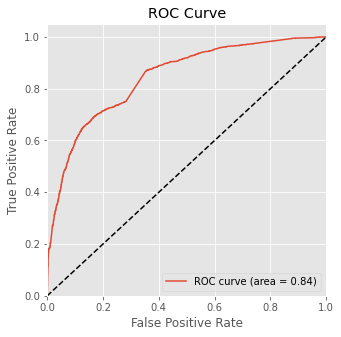

In [550]:
draw_roc(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1["Lead_Prob"])

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [551]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_m1[i]= Y_train_pred_m1["Lead_Prob"].map(lambda x: 1 if x > i else 0)
Y_train_pred_m1.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.284243,580221,0,1,1,1,0,0,0,0,0,0,0
1,1,0.915760,658831,1,1,1,1,1,1,1,1,1,1,1
2,1,0.842236,611640,1,1,1,1,1,1,1,1,1,1,0
3,0,0.284243,631676,0,1,1,1,0,0,0,0,0,0,0
4,0,0.284243,591022,0,1,1,1,0,0,0,0,0,0,0


In [552]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385591  1.000000  0.000000
0.1   0.1  0.549629  0.971131  0.285103
0.2   0.2  0.659246  0.920609  0.495219
0.3   0.3  0.741033  0.739374  0.742073
0.4   0.4  0.779530  0.681235  0.841218
0.5   0.5  0.785405  0.621492  0.888274
0.6   0.6  0.775665  0.545309  0.920232
0.7   0.7  0.752938  0.444266  0.946653
0.8   0.8  0.722789  0.330393  0.969049
0.9   0.9  0.677644  0.172414  0.994716


<Figure size 720x720 with 0 Axes>

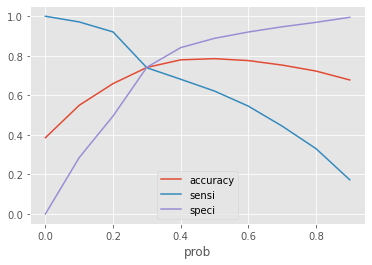

In [553]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
plt.figure(11, figsize=(10,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.29 seems to be the optimum point to take it as a cutoff probability.

In [554]:
Y_train_pred_m1 = predict_lead(X_train_sm, logReg_m1, 0.29)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_m1["Actual_Lead"], Y_train_pred_m1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

Confusion Matrix
 [[2887 1087]
 [ 631 1863]] 

Overall Accuracy 0.73
Sensitivity 0.75


**`Observation`**: As we can see that getting a good combination using this model building through the forward/bottom up method may not be the best approach due to the time consuming nature of the whole process. Furthermore, we are still unsure what is the best combination through this hit and trial method.
Since we have to contantly perform the activity of
- Adding new columns and building model
- check pValue and VIF
- check different metric if pValue and VIF are okay
- drop columns if pValue or VIF is not okay                  
Hence generally Forward method is not used very often specially on a dataset with too many key parameters (independent variables)             

`Conclusion`: We will discard this model creation process and try creating another model since the sensitivity is not very high even at the optimal threshold. 

Other Approaches can be:-
- Backward Approach: Here we add all the columns in the model at once and then try to eliminate Features one by one (not explored)
- Hybrid Approach: RFE or Recursive Feature Elimination + Manual Elimination, where we select the top few important columns and then proceed further using feature elimination.

### Recursive Feature Elimination          

here we will start with few columns which best represent the data set provided.

basic steps for RFE:
- inital step fit the model
- evaluate summary -> VIF, p-values
- drop columns which are not suitable based on p-value and vif
- reFit the model

Now we will create Models in 2 steps
1. With arbitrary probability threshold for calculation of Lead and identification of the variable combination
2. Use ROC curve to predict optimal probability threshold

In [555]:
# Lets create an object for Logistic Regression
logreg = LogisticRegression()

rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, Y_train)

In [556]:
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
        True])

In [557]:
# Lets check which columns got selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('Landing Page Submission', True, 1),
 ('Direct Traffic', True, 1),
 ('Google', True, 1),
 ('Olark Chat', False, 7),
 ('Organic Search', True, 1),
 ('Reference', True, 1),
 ('Converted to Lead', True, 1),
 ('Email Bounced', True, 1),
 ('Email Link Clicked', True, 1),
 ('Email Opened', False, 6),
 ('Olark Chat Conversation', True, 1),
 ('Page Visited on Website', True, 1),
 ('SMS Sent', True, 1),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', False, 4),
 ('Finance Management', True, 1),
 ('Human Resource Management', False, 3),
 ('IT Projects Management', False, 2),
 ('Marketing Management', True, 1),
 ('Operations Management', True, 1),
 ('Supply Chain Management', False, 5),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Better Career Prospects', True, 1)]

In [558]:
# Lets fetch these selected columns only a local variable cols
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Landing Page Submission',
       'Direct Traffic', 'Google', 'Organic Search', 'Reference',
       'Converted to Lead', 'Email Bounced', 'Email Link Clicked',
       'Olark Chat Conversation', 'Page Visited on Website', 'SMS Sent',
       'Banking, Investment And Insurance', 'Finance Management',
       'Marketing Management', 'Operations Management', 'Student',
       'Unemployed', 'Working Professional', 'Better Career Prospects'],
      dtype='object')

`Iteration1`

In [559]:
# Lets start the Model Creation

X_train_rfe = X_train[cols]
X_train_rfe = sm.add_constant(X_train_rfe)

logReg_rfe = sm.GLM(Y_train,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2685.6
Date:                Mon, 07 Sep 2020   Deviance:                       5371.2
Time:                        16:20:47   Pearson chi2:                 7.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8773      0.105     -8.326      0.000      -1.084      -0.671
Total Time Spent on Website           1.1082      0.040     27.550      0.000       1.029       1.187
Landing Page Submission              -0.4510      0.101     -4.469      0.000      -0.649      -0.253
Direct Traffic                       -1.5018      0.142    -10.597      0.000      -1.780      -1.224
Google                               -1.1338      0.117     -9.666      0.000      -1.364      -0.904
Organic Search                       -1.1733      0.137     -8.538      0.000      -1.443      -0.904
Reference                             1.7387      0.216      8.048      0.000       1.315       2.162
Converted to Lead                    -1.1085      0.212     -5.230      0.000      -1.524      -0.693
Email Bounced                        -1.6898      0.291     -5.801      0.000      -2.261      -1.119
Email Link Clicked                   -0.4375      0.204     -2.147      0.032      -0.837      -0.038
Olark Chat Conversation              -1.5868      0.164     -9.695      0.000      -1.908      -1.266
Page Visited on Website              -0.5529      0.152     -3.638      0.000      -0.851      -0.255
SMS Sent                              1.1074      0.077     14.412      0.000       0.957       1.258
Banking, Investment And Insurance     0.3218      0.179      1.802      0.071      -0.028       0.672
Finance Management                    0.2480      0.117      2.121      0.034       0.019       0.477
Marketing Management                  0.4066      0.124      3.268      0.001       0.163       0.650
Operations Management                 0.3360      0.159      2.119      0.034       0.025       0.647
Student                              -1.1081      0.581     -1.908      0.056      -2.246       0.030
Unemployed                           -1.2607      0.547     -2.306      0.021      -2.332      -0.189
Working Professional                  1.3526      0.575      2.354      0.019       0.226       2.479
Better Career Prospects               2.6491      0.550      4.820      0.000       1.572       3.726
=====================================================================================================
"""

We can see that the pValue for Banking, Investment And Insurance is above the threshold of 0.05, hence we need to drop this column.        
But before dropping lets check the VIF as well.

In [560]:
# VIF
display_VIF(X_train, cols)

                             Features     VIF
19            Better Career Prospects  131.34
17                         Unemployed  112.81
18               Working Professional   15.34
1             Landing Page Submission    4.81
16                            Student    4.77
2                      Direct Traffic    3.89
3                              Google    2.72
4                      Organic Search    1.75
11                           SMS Sent    1.63
5                           Reference    1.34
13                 Finance Management    1.26
14               Marketing Management    1.20
0         Total Time Spent on Website    1.16
10            Page Visited on Website    1.15
9             Olark Chat Conversation    1.13
15              Operations Management    1.13
6                   Converted to Lead    1.13
12  Banking, Investment And Insurance    1.09
7                       Email Bounced    1.09
8                  Email Link Clicked    1.04


We have few columns with very high VIF Value, lets also check the basic metrics before proceeding so that we have an understanding how the model is changing.

In [561]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe = predict_lead(X_train_rfe, logReg_rfe, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead'] )
print("Confusion Matrix\n", confusion)

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3518  456]
 [ 765 1729]]
Overall Accuracy 0.81
Sensitivity 0.69
Specificity 0.89


Though these above values are not correct but we get the base against which we can compare in subsequest steps

In [562]:
# Lets start by dropping the "Banking, Investment And Insurance" variable
X_train_rfe.drop("Banking, Investment And Insurance", axis=1, inplace=True)
cols = cols.drop("Banking, Investment And Insurance")

`Iteration 2`

In [563]:
# Lets rebuild the model
logReg_rfe = sm.GLM(Y_train,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.2
Date:                Mon, 07 Sep 2020   Deviance:                       5374.5
Time:                        16:20:47   Pearson chi2:                 7.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8738      0.105     -8.298      0.000      -1.080      -0.667
Total Time Spent on Website     1.1090      0.040     27.570      0.000       1.030       1.188
Landing Page Submission        -0.4290      0.100     -4.286      0.000      -0.625      -0.233
Direct Traffic                 -1.4995      0.142    -10.584      0.000      -1.777      -1.222
Google                         -1.1303      0.117     -9.645      0.000      -1.360      -0.901
Organic Search                 -1.1759      0.137     -8.560      0.000      -1.445      -0.907
Reference                       1.7544      0.216      8.129      0.000       1.331       2.177
Converted to Lead              -1.1071      0.212     -5.220      0.000      -1.523      -0.691
Email Bounced                  -1.6966      0.291     -5.825      0.000      -2.267      -1.126
Email Link Clicked             -0.4346      0.204     -2.135      0.033      -0.834      -0.036
Olark Chat Conversation        -1.5851      0.164     -9.694      0.000      -1.906      -1.265
Page Visited on Website        -0.5588      0.152     -3.675      0.000      -0.857      -0.261
SMS Sent                        1.1094      0.077     14.443      0.000       0.959       1.260
Finance Management              0.2208      0.116      1.905      0.057      -0.006       0.448
Marketing Management            0.3810      0.124      3.085      0.002       0.139       0.623
Operations Management           0.3098      0.158      1.963      0.050       0.000       0.619
Student                        -1.0928      0.580     -1.885      0.059      -2.229       0.044
Unemployed                     -1.2538      0.546     -2.296      0.022      -2.324      -0.184
Working Professional            1.3566      0.574      2.363      0.018       0.231       2.482
Better Career Prospects         2.6437      0.549      4.815      0.000       1.568       3.720
===============================================================================================
"""

As per the above summary all the Variables seem to have acceptable pValues except "Student" which has 0.059 and hence it needs to be dropped.

Before dropping it lets check the VIF and the mtrics

In [564]:
# VIF
display_VIF(X_train, cols)

                       Features     VIF
18      Better Career Prospects  131.34
16                   Unemployed  112.81
17         Working Professional   15.34
15                      Student    4.77
1       Landing Page Submission    4.74
2                Direct Traffic    3.89
3                        Google    2.72
4                Organic Search    1.75
11                     SMS Sent    1.63
5                     Reference    1.33
12           Finance Management    1.24
13         Marketing Management    1.19
0   Total Time Spent on Website    1.16
10      Page Visited on Website    1.15
6             Converted to Lead    1.13
9       Olark Chat Conversation    1.13
14        Operations Management    1.12
7                 Email Bounced    1.09
8            Email Link Clicked    1.04


In [565]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe = predict_lead(X_train_rfe, logReg_rfe, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3521  453]
 [ 762 1732]] 

Overall Accuracy 0.81
Sensitivity 0.69
Specificity 0.89


Overall accurary dropped a little but still since the Model is not optimal i.e. VIF & pValue are high. We cannot reply on these metric yet.

In [566]:
# dropping the "Student" variable
X_train_rfe.drop("Student", axis=1, inplace=True)
cols = cols.drop("Student")

`Iteration 3`

In [567]:
# Lets rebuild the model
logReg_rfe = sm.GLM(Y_train,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2689.2
Date:                Mon, 07 Sep 2020   Deviance:                       5378.3
Time:                        16:20:48   Pearson chi2:                 7.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8806      0.105     -8.365      0.000      -1.087      -0.674
Total Time Spent on Website     1.1106      0.040     27.625      0.000       1.032       1.189
Landing Page Submission        -0.4310      0.100     -4.308      0.000      -0.627      -0.235
Direct Traffic                 -1.4971      0.142    -10.573      0.000      -1.775      -1.220
Google                         -1.1248      0.117     -9.603      0.000      -1.354      -0.895
Organic Search                 -1.1675      0.137     -8.506      0.000      -1.437      -0.899
Reference                       1.7585      0.216      8.151      0.000       1.336       2.181
Converted to Lead              -1.1136      0.212     -5.252      0.000      -1.529      -0.698
Email Bounced                  -1.7063      0.291     -5.865      0.000      -2.277      -1.136
Email Link Clicked             -0.4340      0.203     -2.135      0.033      -0.832      -0.036
Olark Chat Conversation        -1.5875      0.163     -9.714      0.000      -1.908      -1.267
Page Visited on Website        -0.5584      0.152     -3.678      0.000      -0.856      -0.261
SMS Sent                        1.1082      0.077     14.425      0.000       0.958       1.259
Finance Management              0.2200      0.116      1.899      0.058      -0.007       0.447
Marketing Management            0.3906      0.123      3.170      0.002       0.149       0.632
Operations Management           0.3154      0.158      1.997      0.046       0.006       0.625
Unemployed                     -0.3125      0.199     -1.574      0.116      -0.702       0.077
Working Professional            2.2894      0.271      8.444      0.000       1.758       2.821
Better Career Prospects         1.7059      0.209      8.164      0.000       1.296       2.115
===============================================================================================
"""

In [568]:
# VIF
display_VIF(X_train, cols)

                       Features    VIF
17      Better Career Prospects  29.17
15                   Unemployed  24.69
1       Landing Page Submission   4.74
16         Working Professional   4.12
2                Direct Traffic   3.89
3                        Google   2.72
4                Organic Search   1.75
11                     SMS Sent   1.63
5                     Reference   1.33
12           Finance Management   1.24
13         Marketing Management   1.19
0   Total Time Spent on Website   1.16
10      Page Visited on Website   1.15
9       Olark Chat Conversation   1.13
14        Operations Management   1.12
6             Converted to Lead   1.12
7                 Email Bounced   1.08
8            Email Link Clicked   1.04


pValue & VIF for Unemployed is still very high lets drop this column and check how it affects the model.

Before dropping lets check the change in metrics.

In [569]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe = predict_lead(X_train_rfe, logReg_rfe, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3520  454]
 [ 761 1733]] 

Overall Accuracy 0.81
Sensitivity 0.69
Specificity 0.89


Overall accurary increased a little but still since the Model is not optimal i.e. VIF & pValue are high. We cannot reply on these metric yet.

In [570]:
# dropping the "Unemployed" variable
X_train_rfe.drop("Unemployed", axis=1, inplace=True)
cols = cols.drop("Unemployed")

`Iteration 4`

In [571]:
# Lets rebuild the model
logReg_rfe = sm.GLM(Y_train,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.4
Date:                Mon, 07 Sep 2020   Deviance:                       5380.8
Time:                        16:20:48   Pearson chi2:                 7.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8770      0.105     -8.338      0.000      -1.083      -0.671
Total Time Spent on Website     1.1114      0.040     27.643      0.000       1.033       1.190
Landing Page Submission        -0.4300      0.100     -4.299      0.000      -0.626      -0.234
Direct Traffic                 -1.4986      0.142    -10.585      0.000      -1.776      -1.221
Google                         -1.1287      0.117     -9.637      0.000      -1.358      -0.899
Organic Search                 -1.1699      0.137     -8.529      0.000      -1.439      -0.901
Reference                       1.7691      0.216      8.203      0.000       1.346       2.192
Converted to Lead              -1.1185      0.212     -5.277      0.000      -1.534      -0.703
Email Bounced                  -1.7117      0.291     -5.878      0.000      -2.282      -1.141
Email Link Clicked             -0.4352      0.203     -2.143      0.032      -0.833      -0.037
Olark Chat Conversation        -1.5781      0.163     -9.668      0.000      -1.898      -1.258
Page Visited on Website        -0.5640      0.152     -3.715      0.000      -0.862      -0.266
SMS Sent                        1.0991      0.077     14.355      0.000       0.949       1.249
Finance Management              0.2229      0.116      1.927      0.054      -0.004       0.450
Marketing Management            0.3911      0.123      3.175      0.001       0.150       0.632
Operations Management           0.3102      0.158      1.964      0.050       0.001       0.620
Working Professional            2.5849      0.195     13.246      0.000       2.202       2.967
Better Career Prospects         1.4065      0.086     16.272      0.000       1.237       1.576
===============================================================================================
"""

pValue of "Finance Management" is still above the threshold, hence lets drop the column.

In [572]:
# VIF
display_VIF(X_train, cols)

                       Features   VIF
1       Landing Page Submission  4.74
2                Direct Traffic  3.89
16      Better Career Prospects  2.96
3                        Google  2.72
4                Organic Search  1.75
11                     SMS Sent  1.62
5                     Reference  1.33
12           Finance Management  1.24
15         Working Professional  1.21
13         Marketing Management  1.19
0   Total Time Spent on Website  1.16
10      Page Visited on Website  1.15
9       Olark Chat Conversation  1.13
14        Operations Management  1.12
6             Converted to Lead  1.12
7                 Email Bounced  1.08
8            Email Link Clicked  1.04


We have no VIF above the threshold limit, hence now we can check the metrics

In [573]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe = predict_lead(X_train_rfe, logReg_rfe, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3520  454]
 [ 765 1729]] 

Overall Accuracy 0.81
Sensitivity 0.69
Specificity 0.89


In [574]:
# dropping the "Finance Management" variable
X_train_rfe.drop("Finance Management", axis=1, inplace=True)
cols = cols.drop("Finance Management")

`Iteration 5`

In [575]:
# Lets rebuild the model
logReg_rfe = sm.GLM(Y_train,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.3
Date:                Mon, 07 Sep 2020   Deviance:                       5384.5
Time:                        16:20:48   Pearson chi2:                 7.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8709      0.105     -8.290      0.000      -1.077      -0.665
Total Time Spent on Website     1.1106      0.040     27.645      0.000       1.032       1.189
Landing Page Submission        -0.3920      0.098     -4.005      0.000      -0.584      -0.200
Direct Traffic                 -1.4969      0.141    -10.579      0.000      -1.774      -1.220
Google                         -1.1203      0.117     -9.582      0.000      -1.349      -0.891
Organic Search                 -1.1795      0.137     -8.609      0.000      -1.448      -0.911
Reference                       1.7935      0.215      8.332      0.000       1.372       2.215
Converted to Lead              -1.1154      0.212     -5.268      0.000      -1.530      -0.700
Email Bounced                  -1.7187      0.291     -5.905      0.000      -2.289      -1.148
Email Link Clicked             -0.4372      0.203     -2.153      0.031      -0.835      -0.039
Olark Chat Conversation        -1.5798      0.163     -9.688      0.000      -1.899      -1.260
Page Visited on Website        -0.5653      0.152     -3.726      0.000      -0.863      -0.268
SMS Sent                        1.0945      0.076     14.308      0.000       0.945       1.244
Marketing Management            0.3503      0.121      2.890      0.004       0.113       0.588
Operations Management           0.2690      0.156      1.720      0.085      -0.038       0.576
Working Professional            2.5979      0.195     13.310      0.000       2.215       2.980
Better Career Prospects         1.4085      0.086     16.306      0.000       1.239       1.578
===============================================================================================
"""

pValue of "Operations Management" is still above the threshold, hence lets drop the column.

In [576]:
# VIF
display_VIF(X_train, cols)

                       Features   VIF
1       Landing Page Submission  4.57
2                Direct Traffic  3.89
15      Better Career Prospects  2.96
3                        Google  2.71
4                Organic Search  1.75
11                     SMS Sent  1.62
5                     Reference  1.31
14         Working Professional  1.21
0   Total Time Spent on Website  1.16
10      Page Visited on Website  1.15
12         Marketing Management  1.15
9       Olark Chat Conversation  1.13
6             Converted to Lead  1.12
13        Operations Management  1.10
7                 Email Bounced  1.08
8            Email Link Clicked  1.04


We have no VIF above the threshold limit, hence now we can check the metrics

In [577]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe = predict_lead(X_train_rfe, logReg_rfe, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3519  455]
 [ 763 1731]] 

Overall Accuracy 0.81
Sensitivity 0.69
Specificity 0.89


In [578]:
# dropping the "Operations Management" variable
X_train_rfe.drop("Operations Management", axis=1, inplace=True)
cols = cols.drop("Operations Management")

`Iteration 6`

In [579]:
# Lets rebuild the model
logReg_rfe = sm.GLM(Y_train,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.7
Date:                Mon, 07 Sep 2020   Deviance:                       5387.4
Time:                        16:20:49   Pearson chi2:                 7.13e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8655      0.105     -8.250      0.000      -1.071      -0.660
Total Time Spent on Website     1.1120      0.040     27.691      0.000       1.033       1.191
Landing Page Submission        -0.3759      0.097     -3.859      0.000      -0.567      -0.185
Direct Traffic                 -1.4931      0.141    -10.558      0.000      -1.770      -1.216
Google                         -1.1207      0.117     -9.593      0.000      -1.350      -0.892
Organic Search                 -1.1775      0.137     -8.599      0.000      -1.446      -0.909
Reference                       1.7971      0.215      8.350      0.000       1.375       2.219
Converted to Lead              -1.1185      0.212     -5.276      0.000      -1.534      -0.703
Email Bounced                  -1.7217      0.291     -5.917      0.000      -2.292      -1.151
Email Link Clicked             -0.4329      0.203     -2.135      0.033      -0.830      -0.036
Olark Chat Conversation        -1.5820      0.163     -9.711      0.000      -1.901      -1.263
Page Visited on Website        -0.5715      0.152     -3.767      0.000      -0.869      -0.274
SMS Sent                        1.0933      0.076     14.299      0.000       0.943       1.243
Marketing Management            0.3299      0.121      2.736      0.006       0.094       0.566
Working Professional            2.6121      0.195     13.412      0.000       2.230       2.994
Better Career Prospects         1.4090      0.086     16.319      0.000       1.240       1.578
===============================================================================================
"""

Now all the pValues are within the threshold.

In [580]:
# VIF
display_VIF(X_train, cols)

                       Features   VIF
1       Landing Page Submission  4.54
2                Direct Traffic  3.89
14      Better Career Prospects  2.96
3                        Google  2.71
4                Organic Search  1.75
11                     SMS Sent  1.62
5                     Reference  1.31
13         Working Professional  1.20
0   Total Time Spent on Website  1.16
10      Page Visited on Website  1.15
12         Marketing Management  1.14
9       Olark Chat Conversation  1.13
6             Converted to Lead  1.12
7                 Email Bounced  1.08
8            Email Link Clicked  1.04


We have no VIF above the threshold limit, hence now we can check the metrics

In [581]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe = predict_lead(X_train_rfe, logReg_rfe, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Lead"], Y_train_pred_rfe['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3520  454]
 [ 757 1737]] 

Overall Accuracy 0.81
Sensitivity 0.7
Specificity 0.89


### Model Breakdown
Now since we have eliminated all the variables with very high pValue and VIF. We are left with the following model.                  
Model => logReg_rfe using the columns present in X_train_rfe.

We will treat this as the base model and now we will create 2 Different Models
1. Model 1 will be using X_train_rfe and check how good are the predictions at differnet Probability thresholds
2. Model 2 we will try and reduce redundant columns from Business Perspective

In the end we will select one Model and then try to find the optimal Probability Threshold that is aligned with our problem statement or increasing the sensitivity of the model.

### MODEL 1
here we have reached the optimal combination for the model where in all variables have a good value of VIF.                  
So we need not drop any more variables and we can proceed with making predictions using this model only.

In [582]:
# Lets create a copy of the base Model
X_train_rfe_m1 = X_train_rfe.copy()

Now we know that this model gives the following metrics
- Overall Accuracy 0.813
- Sensitivity 0.696
when the probability threshold was at 0.5

Lets check how it behaves for probability threshold 0.4

In [583]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.4
Y_train_pred_rfe1 = predict_lead(X_train_rfe_m1, logReg_rfe, 0.4)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe1["Actual_Lead"], Y_train_pred_rfe1['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe1["Actual_Lead"], Y_train_pred_rfe1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3319  655]
 [ 601 1893]] 

Overall Accuracy 0.81
Sensitivity 0.76
Specificity 0.84


We can observe that once the Threshold cutt off was changed to a lower value the Sensitivity of the Model increased. Lets check few metrics at this Threshold and then we will find the optimal Cut off for this model.

**Metrics beyond simply accuracy & Sensitivity**

In [584]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [585]:
# Let us calculate specificity
round(TN / float(TN+FP),3)

0.835

In [586]:
# Calculate false postive rate - predicting Lead when user does not have become a lead
print(round(FP/ float(TN+FP),3))

0.165


In [587]:
# positive predictive value
print(round(TP/ float(TP+FP),3))

0.743


In [588]:
# Negative predictive value
print(round(TN/ float(TN+FN),3))

0.847


#### Checking the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [589]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

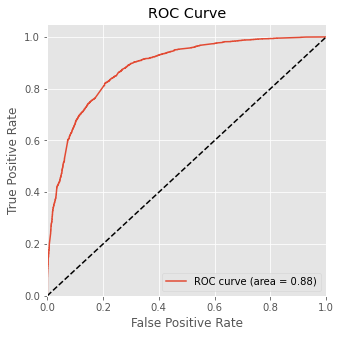

In [590]:
draw_roc(Y_train_pred_rfe1["Actual_Lead"], Y_train_pred_rfe1["Lead_Prob"])

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [591]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_rfe1[i]= Y_train_pred_rfe1["Lead_Prob"].map(lambda x: 1 if x > i else 0)
Y_train_pred_rfe1.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.171674,580221,0,1,1,0,0,0,0,0,0,0,0
1,1,0.962292,658831,1,1,1,1,1,1,1,1,1,1,1
2,1,0.962754,611640,1,1,1,1,1,1,1,1,1,1,1
3,0,0.654797,631676,1,1,1,1,1,1,1,1,0,0,0
4,0,0.115568,591022,0,1,1,0,0,0,0,0,0,0,0


In [592]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_rfe1["Actual_Lead"], Y_train_pred_rfe1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385591  1.000000  0.000000
0.1   0.1  0.610853  0.978348  0.380221
0.2   0.2  0.747062  0.916600  0.640664
0.3   0.3  0.786642  0.870088  0.734273
0.4   0.4  0.805813  0.759022  0.835179
0.5   0.5  0.812771  0.696472  0.885757
0.6   0.6  0.804267  0.627506  0.915199
0.7   0.7  0.770717  0.492382  0.945395
0.8   0.8  0.743970  0.386127  0.968546
0.9   0.9  0.703463  0.251403  0.987167


<Figure size 720x720 with 0 Axes>

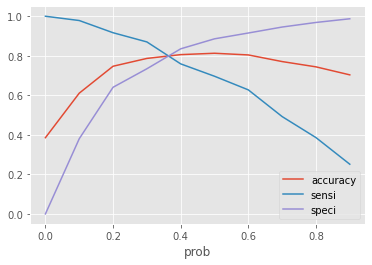

In [593]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
plt.figure(11, figsize=(10,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 seems to be the optimum point to take it as a cutoff probability.

In [594]:
Y_train_pred_rfe1 = predict_lead(X_train_rfe_m1, logReg_rfe, 0.37)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe1["Actual_Lead"], Y_train_pred_rfe1['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe1["Actual_Lead"], Y_train_pred_rfe1['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

Confusion Matrix
 [[3124  850]
 [ 437 2057]] 

Overall Accuracy 0.8
Sensitivity 0.82


Note: The above was not the final model and neither is the most optimal model.

### MODEL 2
#### Build keeping Bussiness Perspective in Mind

Overall Sensitivity could be further improved for the above model as there are many fields which can be interpreted using another field            
Example, confider combinations
- Email Bounced and Email Link Clicked: Here we can say that one would click on a Email link only if the Email was not bounced
- Converted to Lead: Is not relevant here if we want to build a model which predicts if the person would be a lead or not.

So in the subsequest iterations we will drop one of the above mentioned columns and check how the model behaves.

In [595]:
# dropping the "Student" variable
X_train_rfe_m2 = X_train_rfe.copy()
X_train_rfe_m2.drop("Converted to Lead", axis=1, inplace=True)
cols = cols.drop("Converted to Lead")

`Iteration 1`

In [596]:
# Lets rebuild the model
logReg_rfe2 = sm.GLM(Y_train,X_train_rfe_m2, family = sm.families.Binomial())
logReg_rfe2 = logReg_rfe2.fit()
logReg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.0
Date:                Mon, 07 Sep 2020   Deviance:                       5420.1
Time:                        16:20:50   Pearson chi2:                 7.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9133      0.105     -8.713      0.000      -1.119      -0.708
Total Time Spent on Website     1.1154      0.040     27.902      0.000       1.037       1.194
Landing Page Submission        -0.3516      0.097     -3.635      0.000      -0.541      -0.162
Direct Traffic                 -1.5697      0.141    -11.150      0.000      -1.846      -1.294
Google                         -1.1786      0.116    -10.135      0.000      -1.407      -0.951
Organic Search                 -1.2533      0.136     -9.217      0.000      -1.520      -0.987
Reference                       1.8113      0.216      8.404      0.000       1.389       2.234
Email Bounced                  -1.6401      0.291     -5.635      0.000      -2.211      -1.070
Email Link Clicked             -0.3617      0.203     -1.785      0.074      -0.759       0.035
Olark Chat Conversation        -1.5175      0.163     -9.332      0.000      -1.836      -1.199
Page Visited on Website        -0.4870      0.151     -3.219      0.001      -0.783      -0.190
SMS Sent                        1.1761      0.075     15.611      0.000       1.028       1.324
Marketing Management            0.3368      0.120      2.796      0.005       0.101       0.573
Working Professional            2.6139      0.194     13.440      0.000       2.233       2.995
Better Career Prospects         1.4130      0.086     16.394      0.000       1.244       1.582
===============================================================================================
"""

After removing "Converted to Lead" we get high pValue for "Email Link Clicked", hence we need to drop this now

In [597]:
# VIF
display_VIF(X_train, cols)

                       Features   VIF
1       Landing Page Submission  4.53
2                Direct Traffic  3.77
13      Better Career Prospects  2.95
3                        Google  2.61
4                Organic Search  1.70
10                     SMS Sent  1.57
5                     Reference  1.31
12         Working Professional  1.20
0   Total Time Spent on Website  1.15
11         Marketing Management  1.14
9       Page Visited on Website  1.13
8       Olark Chat Conversation  1.12
6                 Email Bounced  1.07
7            Email Link Clicked  1.04


No VIF is above the threshold limit, hence checking the metrics

In [598]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe2 = predict_lead(X_train_rfe_m2, logReg_rfe2, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3524  450]
 [ 773 1721]] 

Overall Accuracy 0.81
Sensitivity 0.69
Specificity 0.89


In [599]:
# dropping the "Email Link Clicked" variable
X_train_rfe_m2.drop("Email Link Clicked", axis=1, inplace=True)
cols = cols.drop("Email Link Clicked")

`Iteration 2`

In [600]:
# Lets rebuild the model
logReg_rfe2 = sm.GLM(Y_train,X_train_rfe_m2, family = sm.families.Binomial())
logReg_rfe2 = logReg_rfe2.fit()
logReg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.7
Date:                Mon, 07 Sep 2020   Deviance:                       5423.4
Time:                        16:20:50   Pearson chi2:                 7.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9438      0.103     -9.126      0.000      -1.146      -0.741
Total Time Spent on Website     1.1157      0.040     27.914      0.000       1.037       1.194
Landing Page Submission        -0.3505      0.097     -3.623      0.000      -0.540      -0.161
Direct Traffic                 -1.5612      0.141    -11.103      0.000      -1.837      -1.286
Google                         -1.1694      0.116    -10.073      0.000      -1.397      -0.942
Organic Search                 -1.2421      0.136     -9.150      0.000      -1.508      -0.976
Reference                       1.8110      0.215      8.414      0.000       1.389       2.233
Email Bounced                  -1.6190      0.291     -5.567      0.000      -2.189      -1.049
Olark Chat Conversation        -1.4916      0.162     -9.206      0.000      -1.809      -1.174
Page Visited on Website        -0.4668      0.151     -3.094      0.002      -0.762      -0.171
SMS Sent                        1.1972      0.074     16.071      0.000       1.051       1.343
Marketing Management            0.3343      0.120      2.777      0.005       0.098       0.570
Working Professional            2.6159      0.194     13.451      0.000       2.235       2.997
Better Career Prospects         1.4149      0.086     16.420      0.000       1.246       1.584
===============================================================================================
"""

All the pValues are with in the threshold so we can focus on VIF for now.

In [601]:
# VIF
display_VIF(X_train, cols)

                       Features   VIF
1       Landing Page Submission  4.53
2                Direct Traffic  3.76
12      Better Career Prospects  2.94
3                        Google  2.60
4                Organic Search  1.69
9                      SMS Sent  1.55
5                     Reference  1.31
11         Working Professional  1.20
0   Total Time Spent on Website  1.14
10         Marketing Management  1.14
8       Page Visited on Website  1.13
7       Olark Chat Conversation  1.12
6                 Email Bounced  1.07


No VIF is above the threshold limit, hence checking the metrics

In [602]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe2 = predict_lead(X_train_rfe_m2, logReg_rfe2, 0.5)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3522  452]
 [ 776 1718]] 

Overall Accuracy 0.81
Sensitivity 0.69
Specificity 0.89


We can observe that the Accuracy remains the same but Sensitivity dropped a little.

Since there is no variable which is not relevant from Business Perspective or some variable which has high pValue or VIF hence we will stop elimination the columns further.                      
Now we have obtained the Model with 13 Columns or variables. Excluding const.                   
Model => logReg_rfe2 with the columns in X_train_rfe_m2

In [603]:
len(X_train_rfe_m2.columns)

14

In [604]:
X_train_rfe_m2.columns

Index(['const', 'Total Time Spent on Website', 'Landing Page Submission',
       'Direct Traffic', 'Google', 'Organic Search', 'Reference',
       'Email Bounced', 'Olark Chat Conversation', 'Page Visited on Website',
       'SMS Sent', 'Marketing Management', 'Working Professional',
       'Better Career Prospects'],
      dtype='object')

#### Observation:                           
Note this was not the most optimal Model since we did not find the optimal cut off for the model but we tried to put an arbitrary cut off of 0.5.

Now lets check the same Model we got in the last iteration and pass Threshold say 0.4 to check how the metrics change.               
Note we have the columns which we require so we will not rebuilt the model but just predict the Y-pred using different value of cut off.

#### Cut-Off as 0.040

In [605]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.4
Y_train_pred_rfe2 = predict_lead(X_train_rfe_m2, logReg_rfe2, 0.4)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3317  657]
 [ 601 1893]] 

Overall Accuracy 0.81
Sensitivity 0.76
Specificity 0.83


We could see that in comparision to RFE Model with Probability cut off as 0.5, the same model with Probability Cut Off as 0.4 gives vastly different values.               
The Overall Accuracy comes around 0.806 and the Sensitivity 0.755.

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

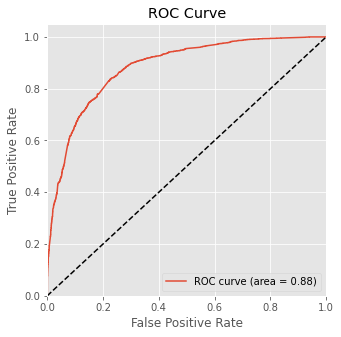

In [606]:
draw_roc(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2["Lead_Prob"])

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [607]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_rfe2[i]= Y_train_pred_rfe2["Lead_Prob"].map(lambda x: 1 if x > i else 0)
Y_train_pred_rfe2.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.154688,580221,0,1,1,0,0,0,0,0,0,0,0
1,1,0.959921,658831,1,1,1,1,1,1,1,1,1,1,1
2,1,0.963885,611640,1,1,1,1,1,1,1,1,1,1,1
3,0,0.661140,631676,1,1,1,1,1,1,1,1,0,0,0
4,0,0.117071,591022,0,1,1,0,0,0,0,0,0,0,0


In [608]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385591  1.000000  0.000000
0.1   0.1  0.594001  0.977947  0.353045
0.2   0.2  0.748609  0.918204  0.642174
0.3   0.3  0.784787  0.872093  0.729995
0.4   0.4  0.805504  0.759022  0.834675
0.5   0.5  0.810142  0.688853  0.886261
0.6   0.6  0.801484  0.620289  0.915199
0.7   0.7  0.768707  0.488372  0.944640
0.8   0.8  0.741033  0.378909  0.968294
0.9   0.9  0.703463  0.251403  0.987167


<Figure size 720x720 with 0 Axes>

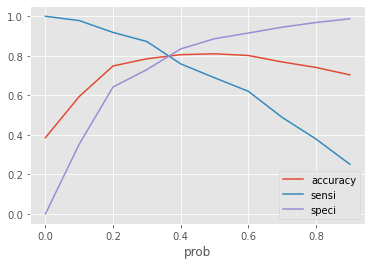

In [609]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
plt.figure(11, figsize=(10,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 seems to be the optimum point to take it as a cutoff probability.

In [610]:
Y_train_pred_rfe2 = predict_lead(X_train_rfe_m2, logReg_rfe2, 0.37)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead'] )
print("Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead']),3))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Confusion Matrix
 [[3108  866]
 [ 431 2063]] 

Overall Accuracy 0.799
Sensitivity 0.83
Specificity 0.78


**Metrics beyond simply accuracy & Sensitivity**

In [611]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [612]:
# Let us calculate specificity
round(TN / float(TN+FP),3)

0.782

In [613]:
# Calculate false postive rate - predicting Lead when user does not have become a lead
print(round(FP/ float(TN+FP),3))

0.218


In [614]:
# positive predictive value
print(round(TP/ float(TP+FP),3))

0.704


In [615]:
# Negative predictive value
print(round(TN/ float(TN+FN),3))

0.878


### Model Results                   
Based upon the above observations and the Final optimised model is                
MODEL => Model 2 using RFE => logReg_rfe2

The combination of columns are

In [616]:
X_train_rfe_m2.columns.to_list()[1:] # Ignoring const

['Total Time Spent on Website',
 'Landing Page Submission',
 'Direct Traffic',
 'Google',
 'Organic Search',
 'Reference',
 'Email Bounced',
 'Olark Chat Conversation',
 'Page Visited on Website',
 'SMS Sent',
 'Marketing Management',
 'Working Professional',
 'Better Career Prospects']

Few metrics obtained for this model are        
- Accuracy = 0.799
- Sensitivity = 0.827

Also Precision and Recall are

In [617]:
print("Precision: ",round(precision_score(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead']),2))
print("Recall: ", round(recall_score(Y_train_pred_rfe2["Actual_Lead"], Y_train_pred_rfe2['Predicted_Lead']),2))

Precision:  0.7
Recall:  0.83


### Making predictions on the test set
before making predictions lets standardize the Test set

In [618]:
X_test[["TotalVisits", "Total Time Spent on Website"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website"]])

In [619]:
X_test_rfe2 = X_test[cols]
X_test_rfe2.head()

,Total Time Spent on Website,Landing Page Submission,Direct Traffic,Google,Organic Search,Reference,Email Bounced,Olark Chat Conversation,Page Visited on Website,SMS Sent,Marketing Management,Working Professional,Better Career Prospects
Lead Number,,,,,,,,,,,,,
588005,-0.896237,0,0,0,0,1,0,0,0,0,1,1,1
610220,0.574699,0,0,1,0,0,0,0,1,0,0,0,0
647941,-0.592536,1,1,0,0,0,0,0,0,0,0,0,1
593498,-0.799272,1,1,0,0,0,0,0,0,1,0,0,1
640459,2.078566,1,0,1,0,0,0,0,0,1,0,0,1


In [620]:
# Lets add constant
X_test_rfe2 = sm.add_constant(X_test_rfe2)

In [621]:
# Making prediction on test set
Y_test_pred_rfe2 = logReg_rfe2.predict(X_test_rfe2)
Y_test_pred_rfe2.head()

Lead Number
588005    0.985689
610220    0.125780
647941    0.108936
593498    0.243225
640459    0.921831
dtype: float64

In [622]:
# Converting y_pred to a dataframe which is an array
Y_test_pred_rfe2 = pd.DataFrame(Y_test_pred_rfe2)

# Also converting the orginal Y_test into a dataFrame
Y_test_act_rfe2 = pd.DataFrame(Y_test)
# Putting Lead Number to index
Y_test_act_rfe2['Lead Number'] = Y_test_act_rfe2.index

# Removing index for both dataframes to append them side by side 
Y_test_pred_rfe2.reset_index(drop=True, inplace=True)
Y_test_act_rfe2.reset_index(drop=True, inplace=True)

In [623]:
# Appending Y_test_pred and Y_test_act
y_pred_final_rfe2 = pd.concat([Y_test_act_rfe2, Y_test_pred_rfe2],axis=1)
y_pred_final_rfe2.head()

,Converted,Lead Number,0
0,1,588005,0.985689
1,0,610220,0.125780
2,1,647941,0.108936
3,1,593498,0.243225
4,1,640459,0.921831


In [624]:
# Renaming the column and rearranging
y_pred_final_rfe2 = y_pred_final_rfe2.rename(columns={ 0 : 'Lead_Prob'})
y_pred_final_rfe2 = y_pred_final_rfe2[['Lead Number','Converted','Lead_Prob']]
y_pred_final_rfe2.head()

,Lead Number,Converted,Lead_Prob
0,588005,1,0.985689
1,610220,0,0.125780
2,647941,1,0.108936
3,593498,1,0.243225
4,640459,1,0.921831


In [625]:
y_pred_final_rfe2['Lead_Predicted'] = y_pred_final_rfe2["Lead_Prob"].map(lambda x: 1 if x > 0.37 else 0)
y_pred_final_rfe2.head()

,Lead Number,Converted,Lead_Prob,Lead_Predicted
0,588005,1,0.985689,1
1,610220,0,0.125780,0
2,647941,1,0.108936,0
3,593498,1,0.243225,0
4,640459,1,0.921831,1


Lets check the metrics

In [626]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final_rfe2["Converted"], y_pred_final_rfe2['Lead_Predicted']),4)

0.7832

In [627]:
confusion_test2 = metrics.confusion_matrix(y_pred_final_rfe2["Converted"], y_pred_final_rfe2['Lead_Predicted'])
confusion_test2

array([[1296,  409],
       [ 192,  875]], dtype=int64)

In [628]:
TP = confusion_test2[1,1] # true positive 
TN = confusion_test2[0,0] # true negatives
FP = confusion_test2[0,1] # false positives
FN = confusion_test2[1,0] # false negatives

In [629]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),4)

0.8201

In [630]:
# Let us calculate specificity
round(TN / float(TN+FP),4)

0.7601

So the Sensitivity of the Test Set is 0.8201 and the Accuracy is 0.7832

#### Lead Score Generation

Based upon the above optimal model, lets generate the Lead Scores using which X Education team can focus upon.                      
Train Data Set => X_train_rfe_m2, Predicted Values => Y_train_pred_rfe2              
Test Data Set => X_test_rfe2, Predicted Values => y_pred_final_rfe2

In [631]:
# Lets check Train Predicted values
Y_train_pred_rfe2.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead
0,1,0.154688,580221,0
1,1,0.959921,658831,1
2,1,0.963885,611640,1
3,0,0.661140,631676,1
4,0,0.117071,591022,0


In [632]:
# Lets check the Test Predicted Values
y_pred_final_rfe2.head()

,Lead Number,Converted,Lead_Prob,Lead_Predicted
0,588005,1,0.985689,1
1,610220,0,0.125780,0
2,647941,1,0.108936,0
3,593498,1,0.243225,0
4,640459,1,0.921831,1


Lets rearrange the columns and make them similar to Train set

In [633]:
y_pred_final_rfe2 = y_pred_final_rfe2[["Converted", "Lead_Prob", "Lead Number", "Lead_Predicted" ]]
y_pred_final_rfe2.columns = ["Actual_Lead","Lead_Prob","Lead Number","Predicted_Lead"]

In [634]:
y_pred_final_rfe2.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead
0,1,0.985689,588005,1
1,0,0.125780,610220,0
2,1,0.108936,647941,0
3,1,0.243225,593498,0
4,1,0.921831,640459,1


Now lets merge these 2 into a DataSet called df_LeadScores

In [635]:
df_LeadScores = Y_train_pred_rfe2.copy()
df_LeadScores = pd.concat([df_LeadScores, y_pred_final_rfe2], axis=0)
df_LeadScores.shape

(9240, 4)

In [636]:
df_LeadScores.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead
0,1,0.154688,580221,0
1,1,0.959921,658831,1
2,1,0.963885,611640,1
3,0,0.661140,631676,1
4,0,0.117071,591022,0


So we have all the values in the same Dataset, lets calculate the Lead Score.                  
Lead Score will be Lead_Prob * 100

In [637]:
df_LeadScores["Lead Score"] = round(df_LeadScores["Lead_Prob"],4)*100
df_LeadScores.head(8)

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead,Lead Score
0,1,0.154688,580221,0,15.47
1,1,0.959921,658831,1,95.99
2,1,0.963885,611640,1,96.39
3,0,0.661140,631676,1,66.11
4,0,0.117071,591022,0,11.71
5,0,0.758745,640453,1,75.87
6,0,0.285759,606664,0,28.58
7,0,0.091613,619446,0,9.16


In [638]:
# Lets sort it based on the Lead Score
df_LeadScores.sort_values("Lead Score", ascending=False, inplace=True)
df_LeadScores.head()

,Actual_Lead,Lead_Prob,Lead Number,Predicted_Lead,Lead Score
2863,1,0.999396,634047,1,99.94
1196,1,0.999352,627106,1,99.94
2517,1,0.999302,588037,1,99.93
1656,1,0.999316,600952,1,99.93
2986,1,0.999091,591536,1,99.91


#### DataFrame df_LeadScores                 
This contains the Actual & Predicted Value of Leads Corresponding to the original Lead Number.                  
Also we have Lead Score present over here which tells us how likely is the Candidate to get converted (incase metrics are required behind Predicted Lead)

## Conclusion

The Final Model of our case study is logReg_rfe2 with the following variables
- 'Total Time Spent on Website',
- 'Landing Page Submission',
- 'Direct Traffic',
- 'Google',
- 'Organic Search',
- 'Reference',
- 'Email Bounced',
- 'Olark Chat Conversation',
- 'Page Visited on Website',
- 'SMS Sent',
- 'Marketing Management',
- 'Working Professional',
- 'Better Career Prospects'

and having the following metrics
- Train Set:
  Accuracy -> 0.799,
  Sensitivity -> 0.823
  
- Test Set:
  Accuracy -> 0.7832,
  Sensitivity -> 0.8201
  
Also the lead scores are stored in df_LeadScores